# 算数数学教育の暗黒面

黒木玄 (Gen Kuroki)

2018-08-21

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT
* Repository: https://github.com/genkuroki/HighSchoolMath

このファイルは次の場所できれいに閲覧できる:

* <a href="http://nbviewer.jupyter.org/github/genkuroki/HighSchoolMath/blob/master/MathEduDarkSide.ipynb">高校数学の話題 HTML版</a>

* <a href="https://genkuroki.github.io/documents/HighSchoolMath/MathEduDarkSide.pdf">高校数学の話題 PDF版</a>

このノートの想定読者は大学である程度を数学を学んだ学生で高校で習った数学について見直したい人達である. 

このファイルは<a href="https://julialang.org/">Julia言語</a>カーネルの <a href="http://jupyter.org/">Jupyter notebook</a> である. 自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ. このファイルは <a href="https://juliabox.com/">JuliaBox</a> でも使用できるかもしれない. このファイル中の<a href="https://julialang.org/">Julia言語</a>のコードを理解できれば, <a href="https://julialang.org/">Julia言語</a>から<a href="https://www.sympy.org">SymPy</a>を用いた数式処理や数値計算の結果のプロットの仕方を学ぶことができる.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\T{{\mathbb T}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
\newcommand\cosec{\operatorname{cosec}}
\newcommand\sign{\operatorname{sign}}
\newcommand\sinc{\operatorname{sinc}}
\newcommand\arctanh{\operatorname{arctanh}}
\newcommand\sn{\operatorname{sn}}
\newcommand\cn{\operatorname{cn}}
\newcommand\cd{\operatorname{cd}}
\newcommand\dn{\operatorname{dn}}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
\newcommand\Li{\operatorname{Li}}
\newcommand\np[1]{:\!#1\!:}
\newcommand\PROD{\mathop{\coprod\kern-1.35em\prod}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#微分は分数商ではないのか？" data-toc-modified-id="微分は分数商ではないのか？-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>微分は分数商ではないのか？</a></span></li><li><span><a href="#高校数学における三角函数の微積分は循環論法なのか？" data-toc-modified-id="高校数学における三角函数の微積分は循環論法なのか？-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>高校数学における三角函数の微積分は循環論法なのか？</a></span></li><li><span><a href="#無理式とは根号内に文字を含む式のことなのか？" data-toc-modified-id="無理式とは根号内に文字を含む式のことなのか？-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>無理式とは根号内に文字を含む式のことなのか？</a></span></li><li><span><a href="#単項式は多項式ではないのか？" data-toc-modified-id="単項式は多項式ではないのか？-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>単項式は多項式ではないのか？</a></span></li><li><span><a href="#等式は方程式と恒等式に分類されるのか？" data-toc-modified-id="等式は方程式と恒等式に分類されるのか？-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>等式は方程式と恒等式に分類されるのか？</a></span></li><li><span><a href="#問題-6÷2(1+2)=?,-2a÷2a=?-の答えは唯一つに決まるか？" data-toc-modified-id="問題-6÷2(1+2)=?,-2a÷2a=?-の答えは唯一つに決まるか？-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>問題 6÷2(1+2)=?, 2a÷2a=? の答えは唯一つに決まるか？</a></span></li><li><span><a href="#ゼロは倍数ではないのか？" data-toc-modified-id="ゼロは倍数ではないのか？-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ゼロは倍数ではないのか？</a></span></li><li><span><a href="#括弧やかけ算の式は1つの数量を表す記号なのか？" data-toc-modified-id="括弧やかけ算の式は1つの数量を表す記号なのか？-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>括弧やかけ算の式は1つの数量を表す記号なのか？</a></span></li><li><span><a href="#かけ算の順序が逆の「式」は誤りなのか？" data-toc-modified-id="かけ算の順序が逆の「式」は誤りなのか？-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>かけ算の順序が逆の「式」は誤りなのか？</a></span></li></ul></div>

In [1]:
using Plots
pyplot()
#gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
#clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn; scale="") = open(fn) do f
    base64 = base64encode(f)
    if scale == ""
        display("text/html", """<img src="data:$mime;base64,$base64">""")
    else
        display("text/html", """<img src="data:$mime;base64,$base64" width="$scale">""")
    end
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK
using Elliptic.Jacobi: cd, sn

## 微分は分数商ではないのか？

>$\ds\frac{dy}{dx}$ は $dy \div dx$ の意味ではないので, $dx$ 分の $dy$ と読んではいけない.

と教えている先生が一部にいるようだ. これは本当に正しいだろうか? 微分形式を含む現代数学における**微分**のスタイルを知っていれば, **そのような教え方は誤り**になるので注意しなければいけない.

実際, 高木貞治『<a href="https://www.google.co.jp/search?q=%E9%AB%98%E6%9C%A8%E8%B2%9E%E6%B2%BB+%E8%A7%A3%E6%9E%90%E6%A6%82%E8%AB%96">解析概論</a>』には以下のように書いてある.


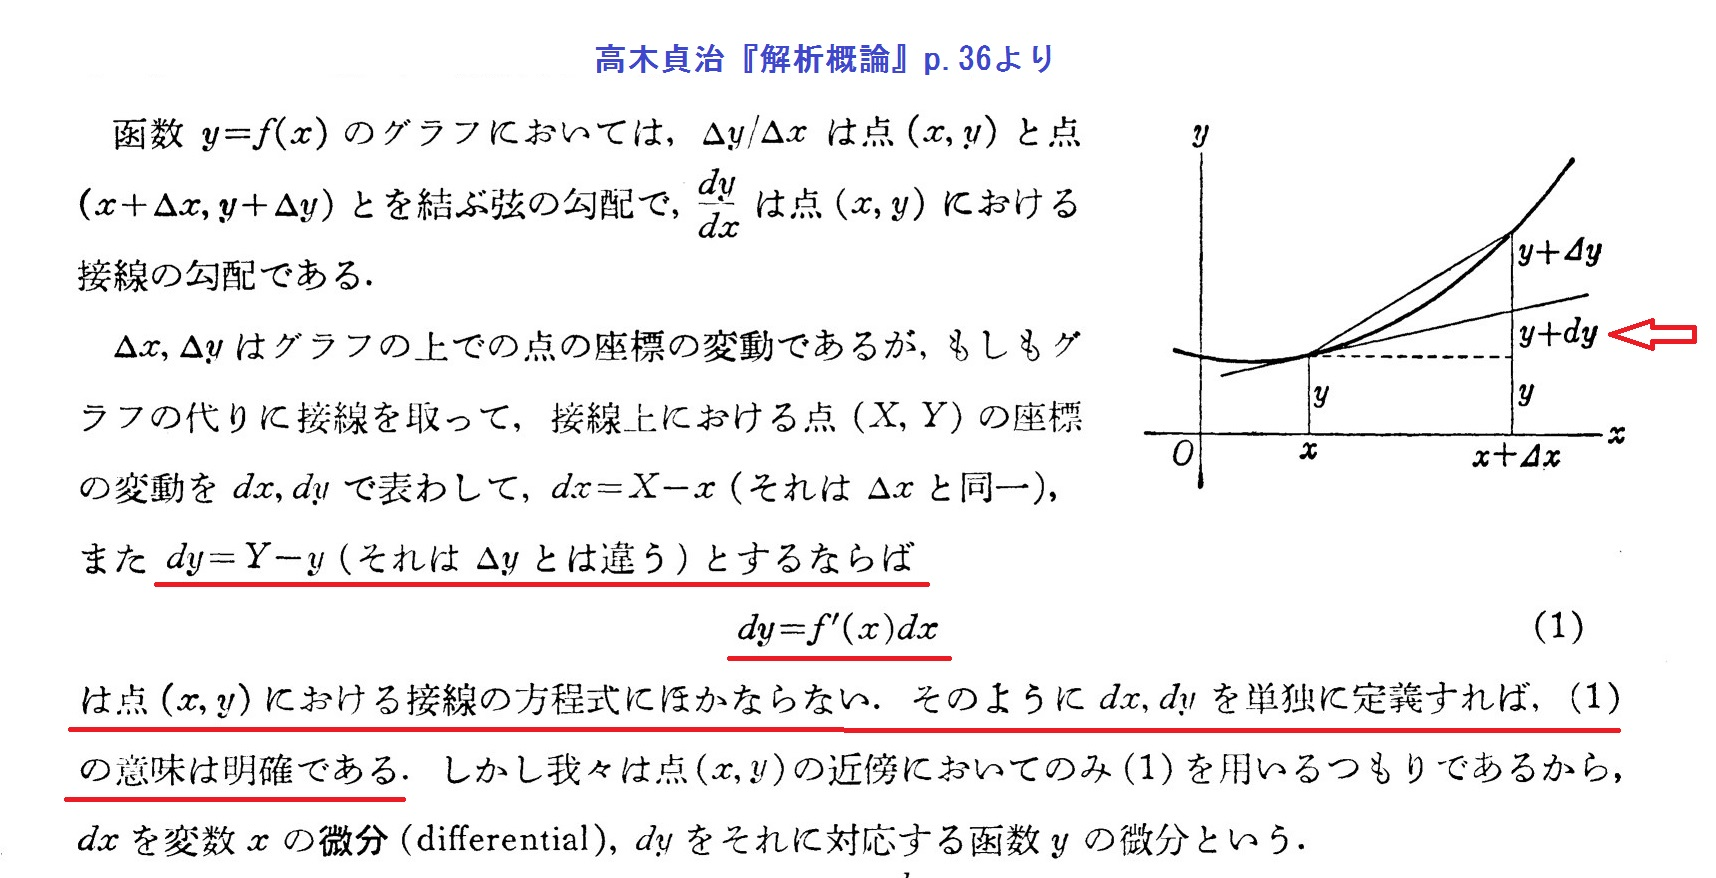

In [105]:
showimg("image/jpeg", "images/kaisekigairon-bibun1.jpg", scale="80%")


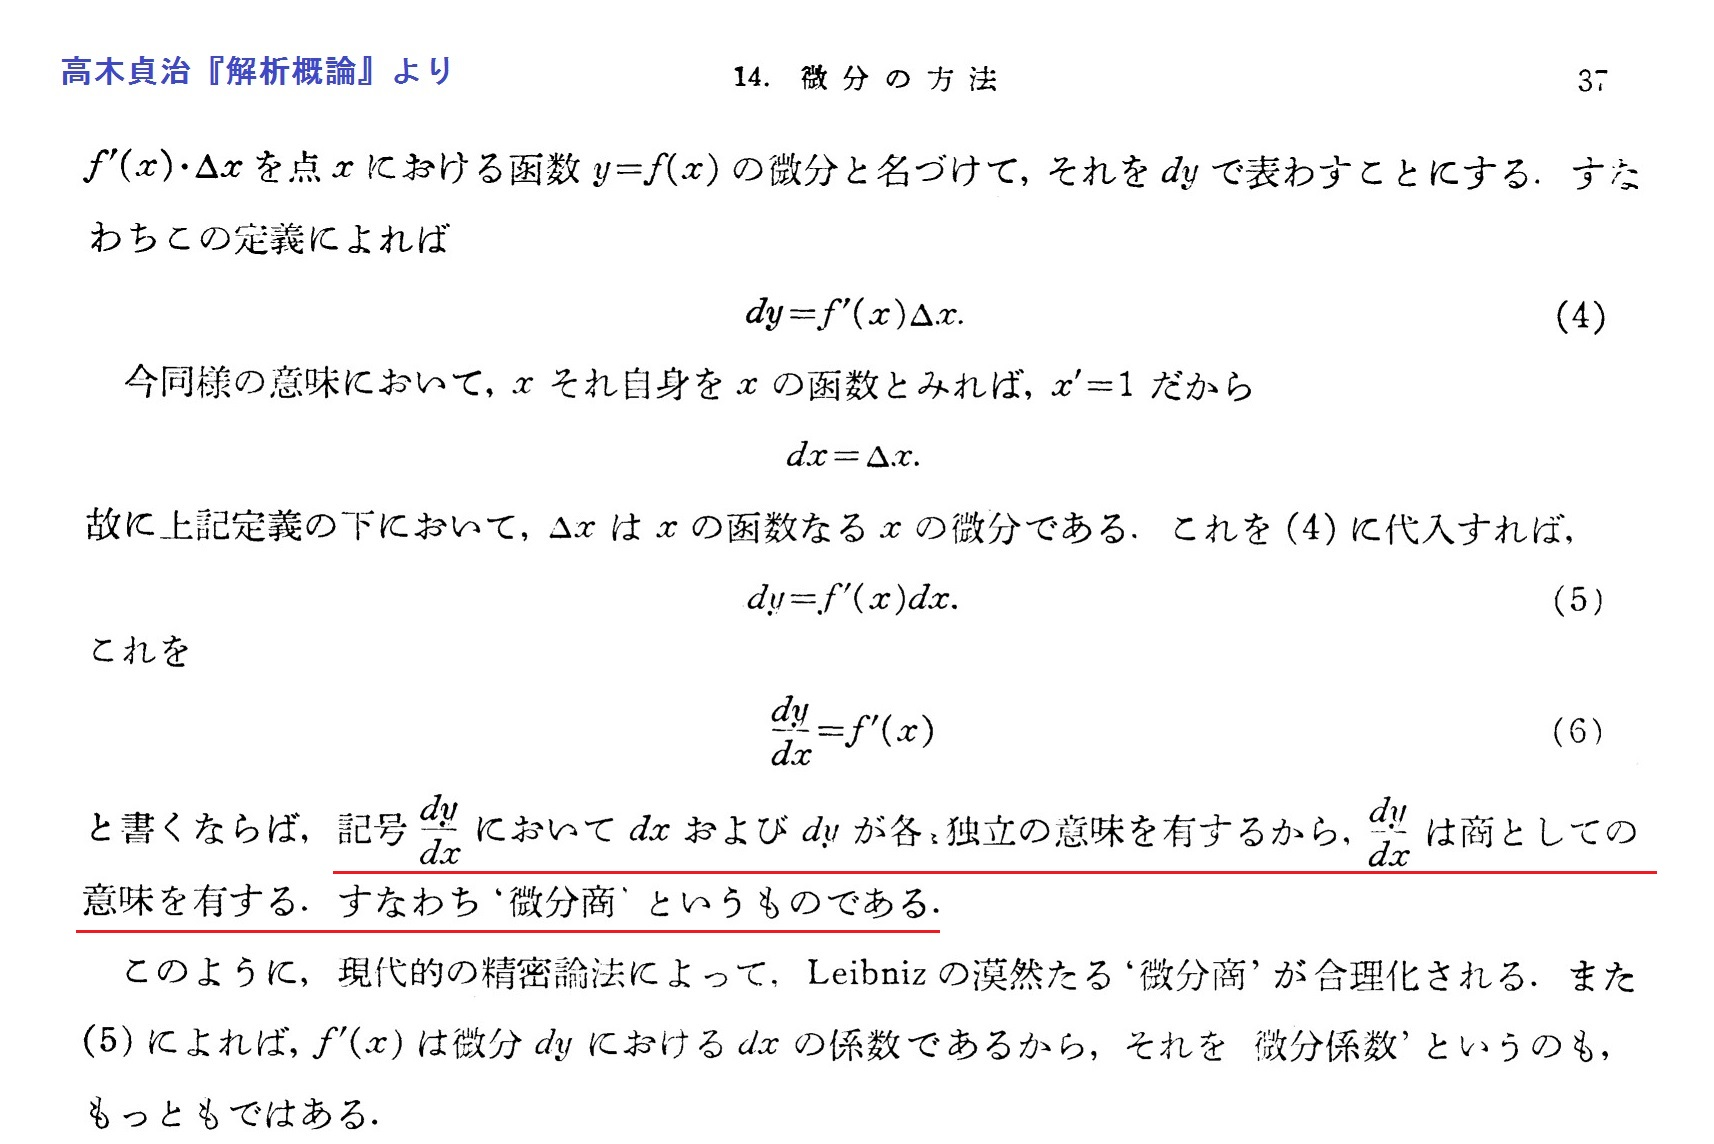

In [104]:
showimg("image/jpeg", "images/kaisekigairon-bibun2.jpg", scale="80%")

以上のように, 高木貞治『解析概論』には

> $\ds\frac{dy}{dx}$ は商として意味を有する.

とはっきり書いてある.  高木貞治氏による $dx$, $dy$ の定義は筆者が独立に描いた次の図と本質的に同じである.


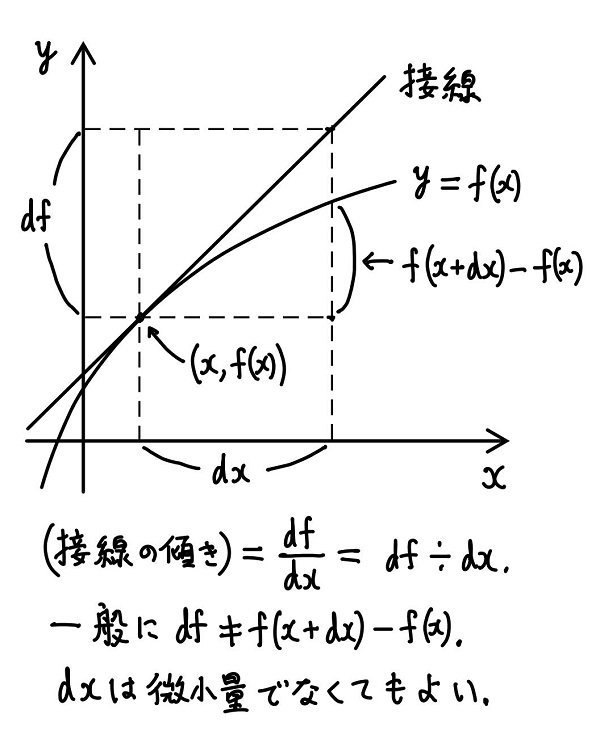

In [83]:
showimg("image/jpeg", "images/bibun.jpg", scale="33%")

$df$ の定義を $f(x+dx)-f(x)$ とするのではなく, 上の図のように取ることが, $\ds\frac{df}{dx}$ を真の分数商とみなすときのポイントになる. 数学の定義はこのような「みもふたもない」ものが多い. この図の $df$ の定義を一般化することによって1次の**微分形式**(differential form)が定義される. 微分形式は現代数学における基本的な概念である.

## 高校数学における三角函数の微積分は循環論法なのか？

答えは**いいえ**である.

高校数学IIIの教科書には「曲線の長さを速さの積分で表す公式」が書いてある:

$$
L = \int_a^b \sqrt{x'(t)^2+y'(t)^2}\,dt.
$$

その公式を用いて弧度法の意味での角度 $\theta$ を $(x(t),y(t))=(\sqrt{1-t^2}, t)$ から得られる

$$
\theta = \int_0^y \frac{dt}{\sqrt{1-t^2}}
$$

で定義したり, $\ds (X(u),Y(u))=\left(\frac{1}{\sqrt{1+u^2}},\frac{u}{\sqrt{1+u^2}}\right)$ から得られる

$$
\theta = \int_0^a \frac{du}{1+u^2}
$$

で定義することによって,  高校数学のスタイルそのままの三角函数の定義に基いて三角函数の微積分の理論を展開できるようになる. 

その結果は循環論法にならないだけではなく, べき級数による天下り的な定義の採用によってすべての議論を再構成する必要がなくなるだけではなく, その他様々な技巧をこらした三角函数の再定義を行う必要もなくなり, そしてさらに楕円函数論にも容易に接続できるような議論の仕方も可能になる.

数学的にはそういう事情になっているので, 数学を本当に理解する気があるならば, 「高校数学における三角函数の微積分は循環論法である」などと安易に言ってはいけない.

実際の理論の展開の仕方の素描を「<a href="https://github.com/genkuroki/HighSchoolMath">高校数学の話題</a>」の方に書いておいたので参照して欲しい.

**補足:** 前者と後者の $\theta$ の定義は

$$
t = \frac{u}{\sqrt{1+u^2}}, \qquad u = \frac{t}{\sqrt{1-t^2}}
$$

という変換によって同値にであることも確認できる. $\QED$

In [37]:
u = symbols("u", real=true)
t = u/√(1+u^2)
simplify(1/√(1-t^2) * diff(t, u))

  1   
------
 2    
u  + 1

In [38]:
t = symbols("t", real=true)
u = t/√(1-t^2)
simplify(1/(1+u^2) * diff(u, t))

      1      
-------------
   __________
  /    2     
\/  - t  + 1 

## 無理式とは根号内に文字を含む式のことなのか？

高校の数学の教科書を見ると,

>$\sqrt{x+1}$, $\sqrt{2x^2-3}$ などのように根号内に文字を含む式をその文字についての**無理式**といい, $x$ についての無理式で表された関数を $x$ の**無理関数**という. (実教出版『数学III』2009年1月25発行)

のように書いてある. これは高校の数学の教科書外では通用しない可能性が高い「定義」である. 

数については, $\sqrt{2}$ などが無理数なだけではなく, $\sqrt[3]{4}$ も無理数だし, $\pi$ のような超越数も無理数である. 数と函数の類似に従えば, $\sin x$ のような超越函数も無理函数と呼びたくなるのだが, 上の定義に従うとそれは不可能になる.

さらに, **上に引用した無理式の定義がおそろしくあいまい**である. $\sqrt{\sin x}$ は無理式なのだろうか?

無理式(irrational expression)や無理函数(irrational function)は19世紀の数学の教科書に見付かる用語である. 19世紀の時代遅れなスタイルが伝言ゲームによって21世紀の現代まで伝わっているいるのだろう.

上に引用したような定義になっていない「定義」は数学の本質と無関係である. 数学を教えるときには, 歴史的な経緯や数学とは無関係の「大人の事情」によって不適切な記述が教科書に残ってしまうことがある. 

数学を教えるときには, **教科書に忠実に従うことは決してやってはいけないこと**である. 

その理由は単に教科書が誤りを含む可能性があるからだけではなく, 非標準的な用語や非標準的な流儀を採用していることがあり, そのような場合にはそれが非標準的であることがわかるように教えなければいけないからである. 教科書に書いてあることはそれが標準的であることを意味しない. 場合によっては教える必要がないことが教科書に書いてあることもある. 数学を教えるときには, 教科書とは独立に何が標準的で何が正しくて何が良い議論の仕方なのかを知っておく必要がある. 

## 単項式は多項式ではないのか？

現代における標準的なスタイルでは**単項式は多項式の特別な場合になる.**

しかし, 非常に残念なことに, 中学校と高校の数学の教科書における用語の体系は以下のようになっているように見える.

| 中学高校の数学教科書 | 現代的に標準的なスタイル |
| :-----: | :-----: |
| 整式 | 多項式 |
| 単項式 | 単項式 |
| 多項式 | 複数の項を持つ多項式 |

現代ではほとんどの通信や放送がデジタル化されている. デジタル通信では情報の符号化とプライバシーを守るための暗号の技術が必要になる. それらの技術を理解するためには多項式環の理論も理解しておかなければいけない. そのような実用的な数学を学ぶためには, 現代的には常識的なスタイルの用語法に従う必要がある.

このような事情になっているにもかかわらず, 中学と高校の数学の教科書は19世紀以来の時代遅れのスタイルを採用してしまっている.  

この点は改善されるべきなのだが, そのような改善が行われる目途は現時点ではまったくない.

下の方の画像はGoogle Booksからの引用である. 以下のリンク先で読める:

* James B. Dodd, High School Arithemtic, 1852, 362 pages. <a href="https://books.google.co.jp/books?id=-UIXAAAAYAAJ&pg=PA129&dq=monomial+polynomial#v=onepage&q=monomial%20polynomial&f=false">Google Books</a>

* Elias Loomis, The Elements of Algebra 1870, 281 pages. <a href="https://books.google.co.jp/books?id=FodTAAAAYAAJ&pg=PA45&dq=monomial+polynomial#v=onepage&q=monomial%20polynomial&f=false">Google Books</a>

* Kunihiko Kodaira, Mathematics 1: Japanese Grade 10, American Mathematical Soc., 1996, 247 pages. <a href="https://books.google.co.jp/books?id=nOkrDAAAQBAJ&pg=PA27&dq=integral-expression+monomial+polynomial#v=onepage&q=integral-expression%20monomial%20polynomial&f=false">Googl Books</a>

以下の引用を見れば19世紀には「単項式は多項式ではない」というスタイルで教科書が書かれていたことがわかる. 問題なのはそういう時代遅れなスタイルが21世紀の現代日本の数学の教科書でも採用されていることである. 日本の教科書の英訳を見ると, 19世紀のスタイルをそのまま踏襲しているように見える.


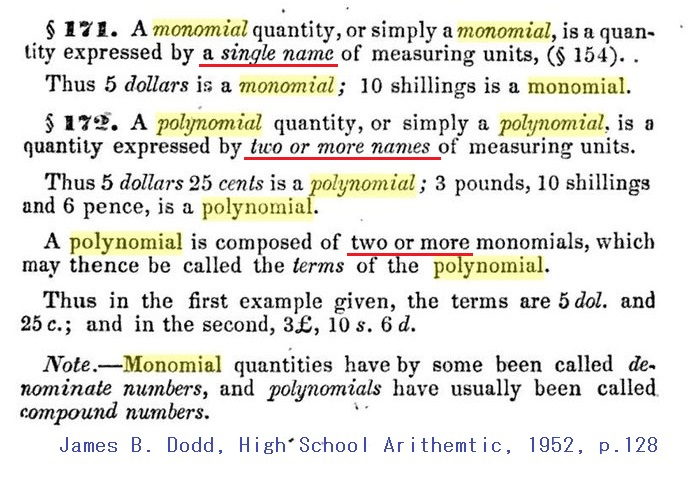

In [106]:
showimg("image/jpeg", "images/polynomial1852.jpg", scale="70%")


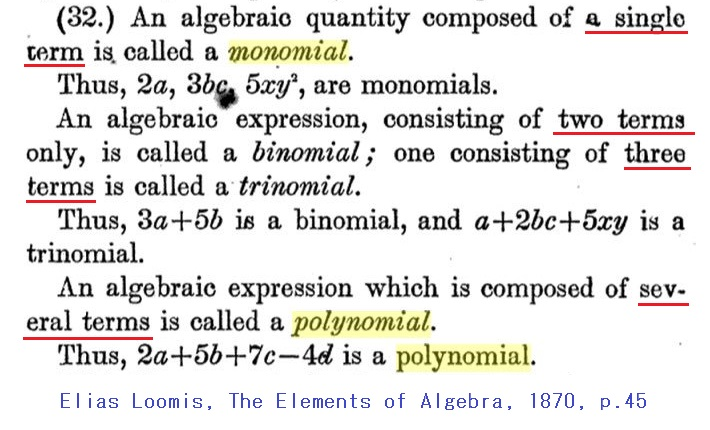

In [107]:
showimg("image/jpeg", "images/polynomial1870.jpg", scale="60%")


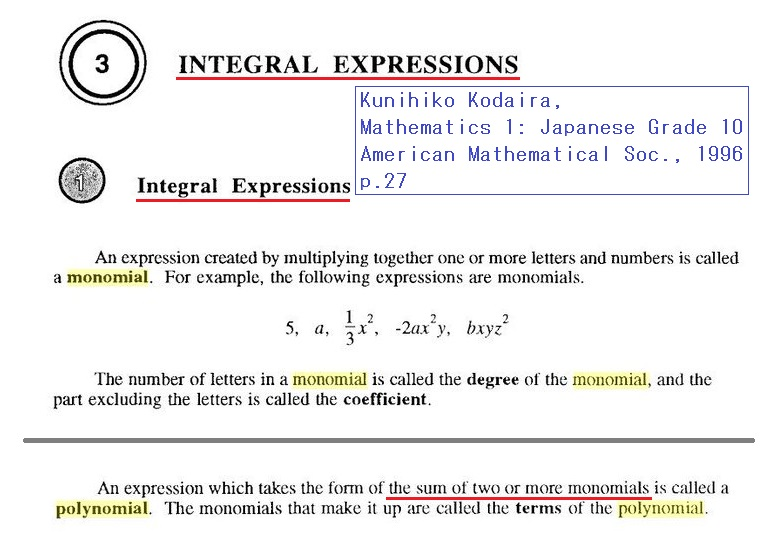

In [108]:
showimg("image/jpeg", "images/polynomial1996.jpg", scale="70%")

## 等式は方程式と恒等式に分類されるのか？

答えは**いいえ**である.  

あらゆる等式は単に「左辺と右辺が等しい」という意味を持つに過ぎない. 

等式を与えただけでその等式が, 方程式になったり, 恒等式になったりするわけではない. 

例えば, 等式 $x=x$ について,

* $x=x$ を満たすすべての実数 $x$ を求めよ.

という問題を考えれば方程式を考えていることになるし, 

* $x=x$ はすべての実数 $x$ について成立している.

と言えば $x=x$ が実数直線上の恒等式であることを主張している. 

等式に含まれる文字が増えた場合も同様である.

例えば, $ax+b=c$ を $x$ に関する方程式とみなすときには, 「$a$, $b$, $c$ が与えられているときに, 等式 $ax+b=c$ を満たす $x$ を求めること」を考えていることになる.

例えば, $ax+b=c$ を $x$ に関する恒等式とみなすときには, 「すべての数 $x$ について等式 $ax+b=c$ が成立するような $a,b,c$ 」について考えていることになる.

等式だけを見て, その等式が方程式であるか恒等式であるかを判定することは不可能である.

しかし, <a href="https://www.google.co.jp/search?q=%E7%AD%89%E5%8F%B7+%E6%96%B9%E7%A8%8B%E5%BC%8F+%E6%81%92%E7%AD%89%E5%BC%8F">「等式 方程式 恒等式」をGoogleで検索</a>すると, 等式の方程式と恒等式への分類にこだわっている解説が多数見つかる.

実はこれもまた「19世紀の時代遅れのスタイルが中学高校での数学教育に残ってしまっている」という問題の一例に過ぎない.

19世紀の教科書には, equations (等式という意味)を identities (恒等式)と conditional equations (条件によって成立したり成立しなかったりする等式, 単に equation と書かれることも多い)に分けて説明するスタイルを採用しているものがあって, そのスタイルが日本語圏の中学高校の数学教育における「等式を恒等式と方程式に分けて説明するスタイル」として生き残っているものだと推測される. 

|19世紀スタイル|意味|
|:------------:|:--:|
|equation|等式|
|identity|恒等式|
|conditional equation|条件によって成立したりしなかったりする等式|

あらゆる等式は単に両辺が等しいことを意味する式(記号列)に過ぎない. 文脈によってニュアンスを変えたい場合に恒等式と呼んだり, 方程式と呼んだりするだけである.

以下の引用は

* C. A. Van Velzer and Chas. S. Slichter, University Algebra, 1892, 732 pages. <a href="https://books.google.co.jp/books?id=rkQ1AQAAMAAJ&pg=PA135#v=onepage&q&f=false">Google Books</a>

より. 19世紀の教科書による説明.


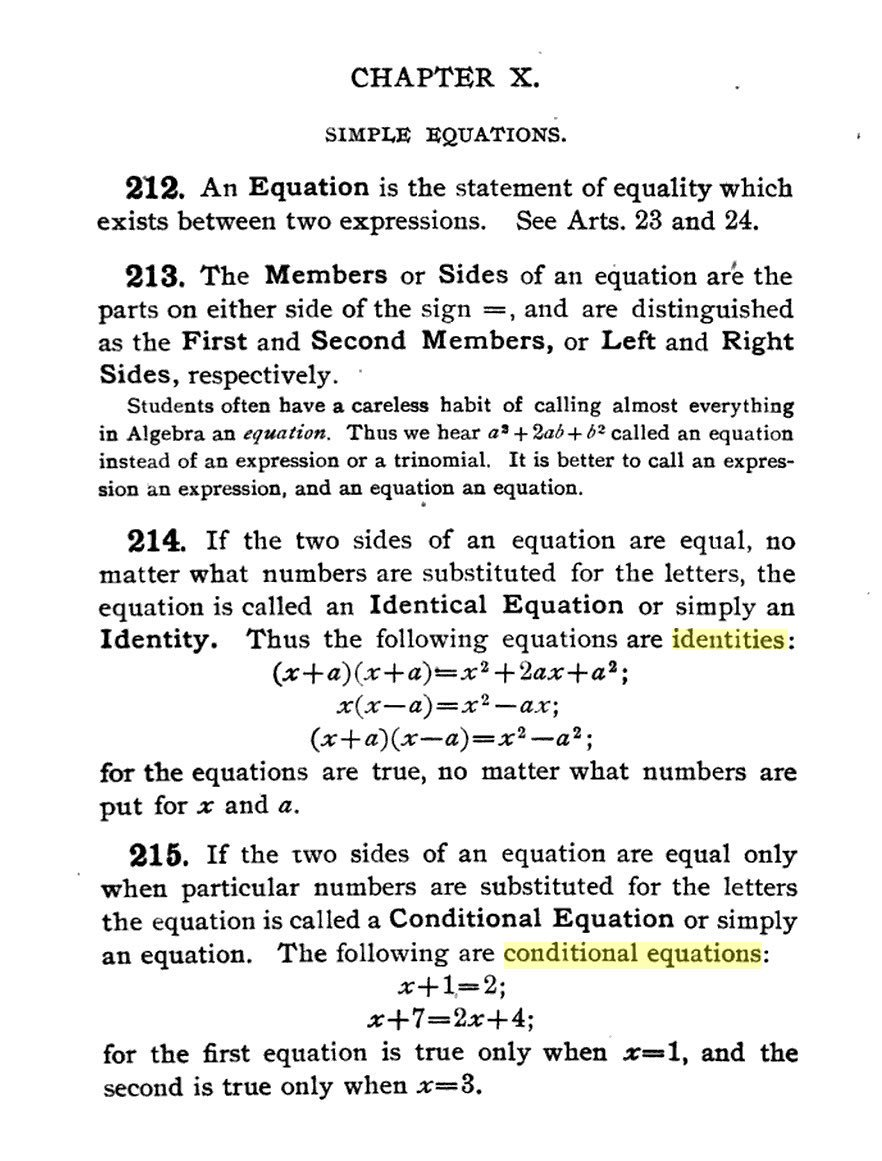

In [109]:
showimg("image/jpeg", "images/equation1892.jpg", scale="70%")

実際には様々な条件が複雑に入り組んだ問題を考えることが多い. 例えば, 

>**問題(<a href="https://www.kahoku.co.jp/special/exam2018_tohokudai/index_sp.html"></a>東北大学入試問題2018年前期日程</a>, 理系\[3\]):** 整数 $a,b$ は等式
>
>$$3^a - 2^b = 1 \qquad\qquad\cdots\cdots\text{①}$$
>
>を満たしているとする。
>
>(1) $a,b$ はともに正となることを示せ。
>
>(2) $b>1$ ならば, $a$ は偶数であることを示せ。
>
>(3) ①を満たす整数の組 $(a,b)$ をすべてあげよ。

これは広い意味での方程式の問題なのだが, **方程式という用語を使ってもこの問題を解くためには役に立たない**. このような問題を解くためには, 

**どのような仮定のもとで, どのような条件を満たす何を求めたいのか？もしくは考えるのか？**

というような普遍的に通用するスタイルを採用する必要がある. 

例えば, (1)では $a$ が0以下の場合に等式①が成立しないことと, $b$ が0以下のとき等式①が成立しないことを示さなければいけない. 

(2)では $b$ が2以上の整数のとき, 等式①を満たす整数 $a$ が偶数でなければいけないことを示さなけばいけない(ヒント: mod 4 で考えよ). 

(3)では(2)を使って $b>1$ の場合に等式①を満たす $a$ をすべて求めなければいけないだろう(ヒント: $a=2k$ のとき①は $3^{2k}-1=2^b$ すなわち $(3^k+1)(3^k-1)=2^b$ と同値になる. $3^k+1$ と $3^k-1$ の最大公約数を互除法で求めよ). $b=1$ の場合は $a=1$ となることがすぐにわかる.

上に述べたような普遍的なスタイルで常に考えるようにすれば19世紀由来の「等式を恒等式と方程式に分類するスタイル」は完全に忘れても大丈夫である.

## 問題 6÷2(1+2)=?, 2a÷2a=? の答えは唯一つに決まるか？

答えは**決まらない**である.

* <a href="https://www.google.co.jp/search?q=%226%C3%B72(1%2B2)%22">6÷2(1+2)をGoogleで検索</a>

「6÷2(1+2)=?」はインターネット上で話題になった問題である.

数式は決められた規則によって解釈されなければいけない. しかし, その規則が決まっていない場合には解釈が唯一つに確定しないことになっていまう. 「6÷2(1+2)=?」はまさにそのような例になっている.

「6÷2(1+2)」には少なくとも「(6÷2)×(1+2)」と「6÷(2×(1+2))」の2通りの解釈があり得る. 前者ならば答えは9になり, 後者ならば1になる. インターネット上では「答えは9」派と「答えは1」派が争うことに成り易いのだが, そのどちらの派閥も間違っていることになる. 解釈が一意に確定しない問題について答えがどちらになるかを争っても無意味である.

「6÷2(1+2)」問題については英語の次のサイトが秀逸である:

* <a href="https://math.stackexchange.com/questions/33215/what-is-48%C3%B7293">What is 48÷2(9+3)?</a>

そこでは「数学的記号法に最高裁判所は存在しない」という回答の人気が高い. 

$2a\div 2a$ についても少なくとも $((2\times a)\div 2)\times a$ と $(2\times a)\div (2\times a)$ の2通りの解釈が存在するので, 答えは唯一に確定しない. しかし, 中学校の数学の教科書的には $2a\div 2a$ は $1$ のみが正解であるということになっており, しかも正解をそれに限定するためのルールが教科書では一切説明されていない. そして, 仮にルールが説明されていたとしても, そのルールは単なるローカルルールに過ぎず, 中学校の外では通用しない. そして, 恐ろしいことに $6ab \div 2a$ のような曖昧な問題は全国の高校入試における定番の問題になっており, 表沙汰になっていない被害者は相当な数にのぼるものと推測される. 

日本語圏において, ただでさえ混乱し易いインターネット上の議論をさらに混乱させたのはおかしな主張をしている「論文」の存在である. 具体的には次の2つの「論文」の内容には問題がある. 

* \[熊倉2006\] 熊倉啓之, 乗除混合演算式についての理解と指導に関する研究 : A÷B×CとA÷BCのタイプの式に焦点を当てて, 2006. <a href="https://shizuoka.repo.nii.ac.jp/?action=pages_view_main&active_action=repository_view_main_item_detail&item_id=113&item_no=1&page_id=13&block_id=21">リポジトリ</a>

* \[熊倉2016\] 熊倉啓之, 文字式の計算順序に関する指導 : 「かけ算記号省略優先」規則に焦点を当てて, 2016. <a href="https://shizuoka.repo.nii.ac.jp/?action=pages_view_main&active_action=repository_view_main_item_detail&item_id=8171&item_no=1&page_id=13&block_id=21">リポジトリ</a>

\[熊倉2006\]のp.51には次の画像のように書いてある.


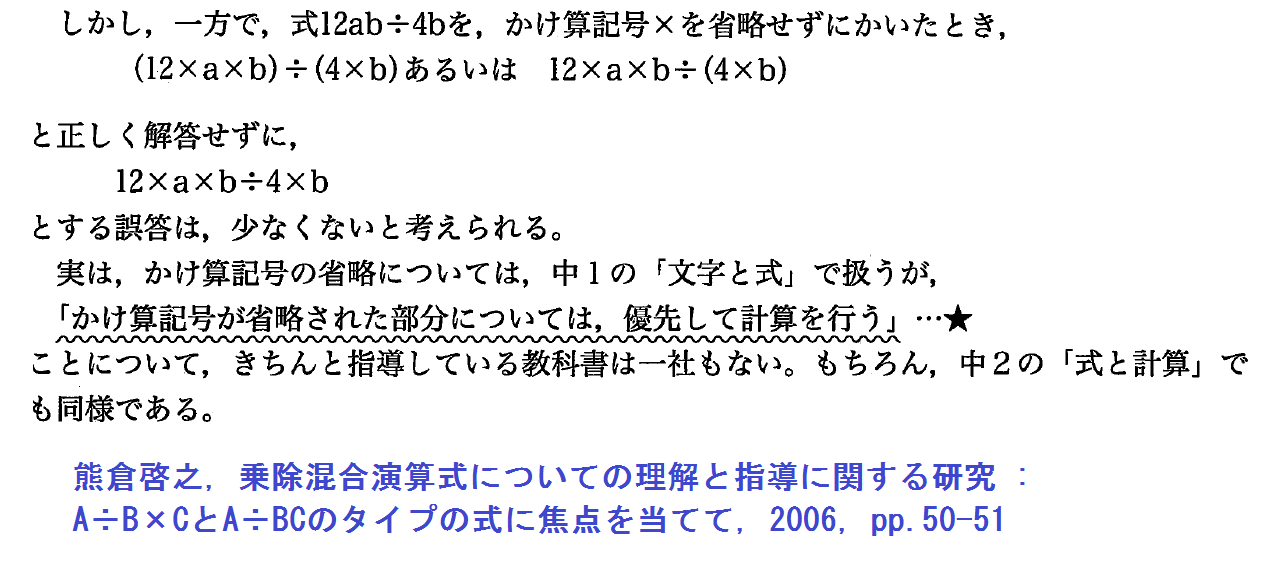

In [110]:
showimg("image/png", "images/kumakura2006.png", scale="80%")

これだけではニュアンスが確定しないが, 論文全体と次に紹介する引用を見ればわかるように, 以上で引用した部分は「かけ算記号が省略された部分については, 優先して計算を行う」という確固たるルールがあるのにそれを教えないのは「けしからん」という主張である.

インターネット上ではこの論文を引用して, 「6÷2(1+2)」における「かけ算記号がされた部分」である「2(1+2)」は「優先して計算を行う」ことになっているので, 答えは1になると主張している人達がいた.

もちろんこのような議論の仕方は誤りである. 誰かが書いた「論文」に書いてあることは正しいことの根拠にはならない. 「論文」に書いてあるか否かではなく, 証拠が提出されているかが本質的なのである.

実際には存在しないルールがあたかも当然のルールであるかのように語っている論文を引用して根拠として採用することは単なる権威主義であり, 真面目に正誤を議論する態度ではない.

さらに, \[熊倉2016\] には以下に引用するように書いてある.


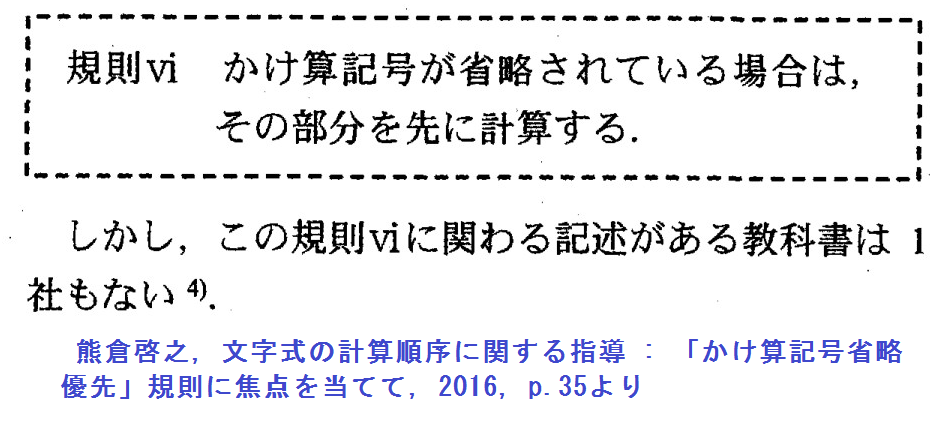

In [111]:
showimg("image/png", "images/kumakura2016-1.png", scale="45%")


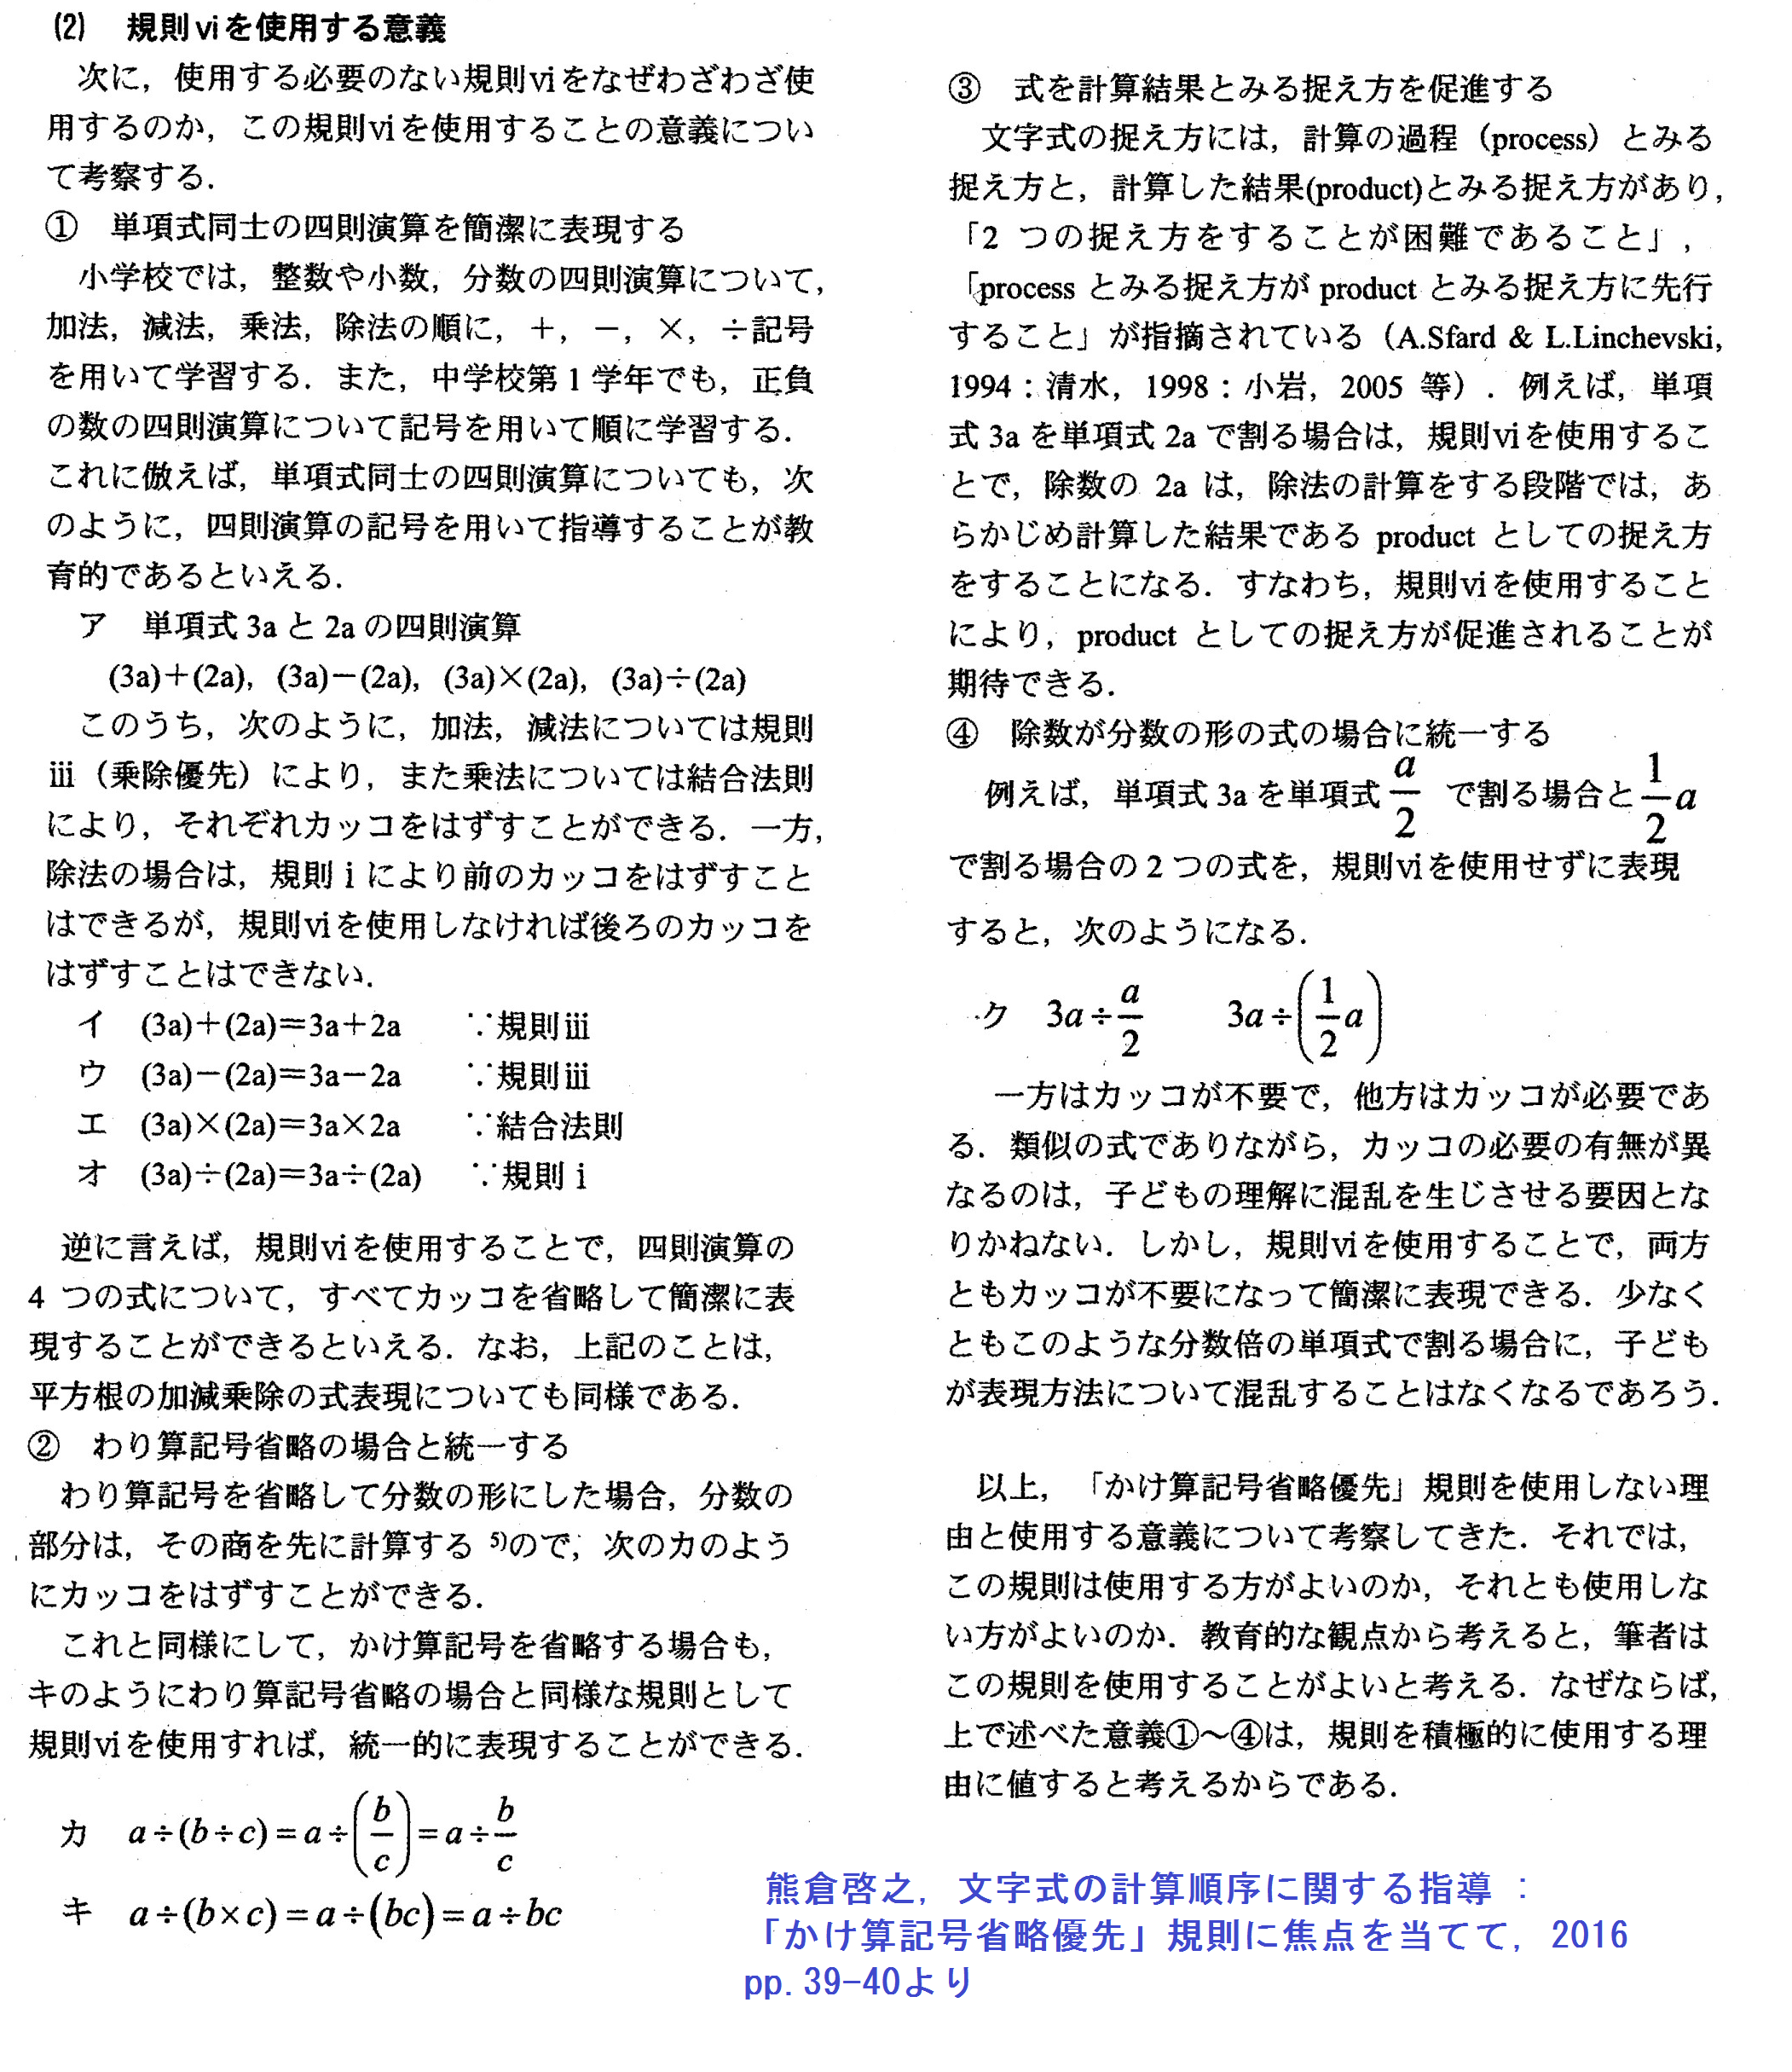

In [112]:
showimg("image/png", "images/kumakura2016-2.png", scale="90%")

「かけ算記号が省略されている場合は, その部分を先に計算する」(規則vi)を使用したときのメリットを4つ述べているので順番にコメントして行こう.

①は確かに正しい. 規則viを使用すれば確かに括弧の使用量を減らすことができる. しかし, 括弧の使用量を減らしたければ, 横線の分数表記 $\ds\frac{3a}{2a}$ を使えばよいだけなので規則viのメリットはほぼない.

②も $\div$ 記号の使用継続にこだわるという不合理な方針を採用しているので, 規則vi採用の合理的な理由として採用できない. 

熊倉氏は横線の分数表記(例: $\ds\frac{b}{c}$)と横に記号を並べる記号法(例: $bc$)を同様に扱いたいようだが, そもそも演算の優先順位の観点から横線の分数表記と横に記号を並べる記号法の仕組みが全く異なることを理解しているのだろうか?

横線の分数表記では横線の長さの分だけひとかたまりとみなされ優先的にその部分が先に計算される. 横に記号を並べる記号法では演算子の優先順位を決めることによって括弧の使用量を減らすことができるように工夫する. 横線の分数表記で括弧が必要がなくても, 横に記号を並べる記号法では必要になることがあっても何にも問題がない.

③は全くのナンセンス. 

この文脈で, プロセス(過程)は「計算が終わっていない式」というような意味で, プロダクト(結果)は「計算が終わった式」というような意味である.

算数では「36÷12」のような式における36も12も「計算が終わった式」とみなされており, 「36÷12」の全体は「計算が終わっていない式」とみなされる. 「36÷(3×4)」における3×4は「計算が終わっていない式」とみなされる. 算数ではおおむね演算子 $+,-,\times,\div$ を含む式は「計算が終わっていない式」とみなされる.

それとの類似で「3a÷2a」についても教えようというのが③の主旨であると思われる. $2a$ の部分には $\times$ という演算子記号が存在しないので, 算数に慣れた生徒が「12」のような「計算が終わった式」とみなすことを期待しているのだろう.

しかし, 数学を正しく理解するためには式を「計算が終わっていないとみなされる式」と「計算が終わったとみなされる式」に分類することは有害である. 

数学を理解するために必要な考え方は「目的ごとに適切な形式に等値変形すること」である. 例えば $2a$ は $2×a$, $a×2$, $a+a$, $5a-3a$ のどれとも等しい. 例えば

$$3a,\quad 5a,\quad 9a,\quad 17a,\quad \ldots$$

は

$$(2+1)a,\quad (2^2+1)a,\quad (2^3+1)a,\quad (2^4+1)a,\quad\ldots$$

と書き直した方が規則性が見易いだろう. 目的ごとにどのような形式に整理した方がよいかは大幅に変化する.

他にも $(x+2)^2 - 1$ は展開した結果を見たいならば $x^2+4x+3$ と変形することになるが, 因数分解した $(x+1)(x+3)$ の形の式が欲しいことは実に多い. 

こういう事情があるので, 算数に過剰に不適切な形で慣れてしまったせいで演算子が残っているか否かに基いて「計算が終わっていない式」「計算が終わった式」というよろしくない見方をしがちな生徒に対して, そのよろしくない見方を維持させるような教え方をするのは止めた方がよい.

算数の教科書通りの教え方では, $2+4$, $8-2$, $2\times 3$, $12\div 2$ のどれもが完全に同一の数を表す記号列(式)であることを教えない.  そもそもそれらがどれも数を表す記号列(式)であることさえ教えない. この点についても後で触れる.

算数の段階で $9-1$ と $2\times 4$ が完全に同一の数を表す異なる記号列(式)であるとしっかり教えていれば, $(x+2)^2-1$ と $(x+1)(x+3)$ が完全に同一の多項式を表す記号列(式)であることも納得し易いだろう.

現実の数学教育における困難の多くが算数教育における問題のある教え方に関係している.

④ $\ds\frac{a}{2}$ と $\ds\frac{1}{2}a$ は確かに完全に同一の多項式を表す記号列(式)であるが, 前者は $a$ を $2$ で割った結果を意味し, 後者は $1/2$ と $a$ の積である. それらを式の解釈時に使用されるルールで同じように扱う必然性はない. 

もしも生徒が次のような考え方をしていたら, 教師はそれは誤りだとはっきり指摘しなければいけない. 

**誤った考え方:** $\ds\frac{1}{2}a$ は演算記号 $\times$ 記号を含まないので計算が終わった式とみなされる. すなわち, 算数における計算問題の答えと同じような扱いになる. 算数における計算問題において $12$ が分離できない1つの数とみなされるのと同様に, $\ds\frac{1}{2}a$ も分離できないひとかたまりの式とみなされる. $\QED$

$3a\div\frac{1}{2}a$ の解釈は $\div$ とかけ算記号を省略した並置積表記のどちらの優先順位が高いかを決めないと決まらない. そしてどちらを優先するかに関する標準的なルールは存在しない.

以上のように, 熊倉氏による意見①～④にはまったく説得力がない. 説得力がないどころが教育的に有害な意見を述べているようにも見える.

**数学は学校内で使用できればよい知識ではない. 勝手にローカルルールを作ってしまうことのデメリットは大きい. 非標準的なローカルルールを導入して混乱が減ると考えるのは基本的に誤りである.**

岩倉氏の調査でも日本以外では横線の分数表記を主に扱っている教科書が結構多い. そして, 日本でも $\div$ 記号はより高級な数学を学ぶ過程でほとんど使用されなくなる. 中学校以降は $\div$ 記号の使用を止めて, 見易さで優る横線の分数表記に以降するようになっている.

$$
(x^2+1)\div(x^2+x+1) = \frac{x^2+1}{x^2+x+1}
$$

では右辺の書き方の方が一目でどういう意味の式であるかが見易いだろう. $\div$ 記号を使用した式は見易くなく, 人間にとって優しく(易しく)ない.  国際的には, 横線の分数表記を使いたくない場合には, $\div$ ではなく, $/$ を使うことの方が圧倒的に多い. 

中学生にも $\div$ の代わりに横線の分数表記や $/$ を主に使うことを教えた方が標準的な記号法に慣れるという意味で好ましいのではないか?

## ゼロは倍数ではないのか？

常識的には**0はあらゆる数の倍数**である.

しかし, 実際に算数の教科書を確認すると以下のように書いてある. 以下では東京書籍の算数教科書を引用するが他社の算数教科書についてほぼ同様である. 驚くべきことに

* 0は偶数とします。

* 0は, 倍数には入れないことにします。

と書いてある! 常識的には**0は偶数でかつあらゆる数の倍数**である.


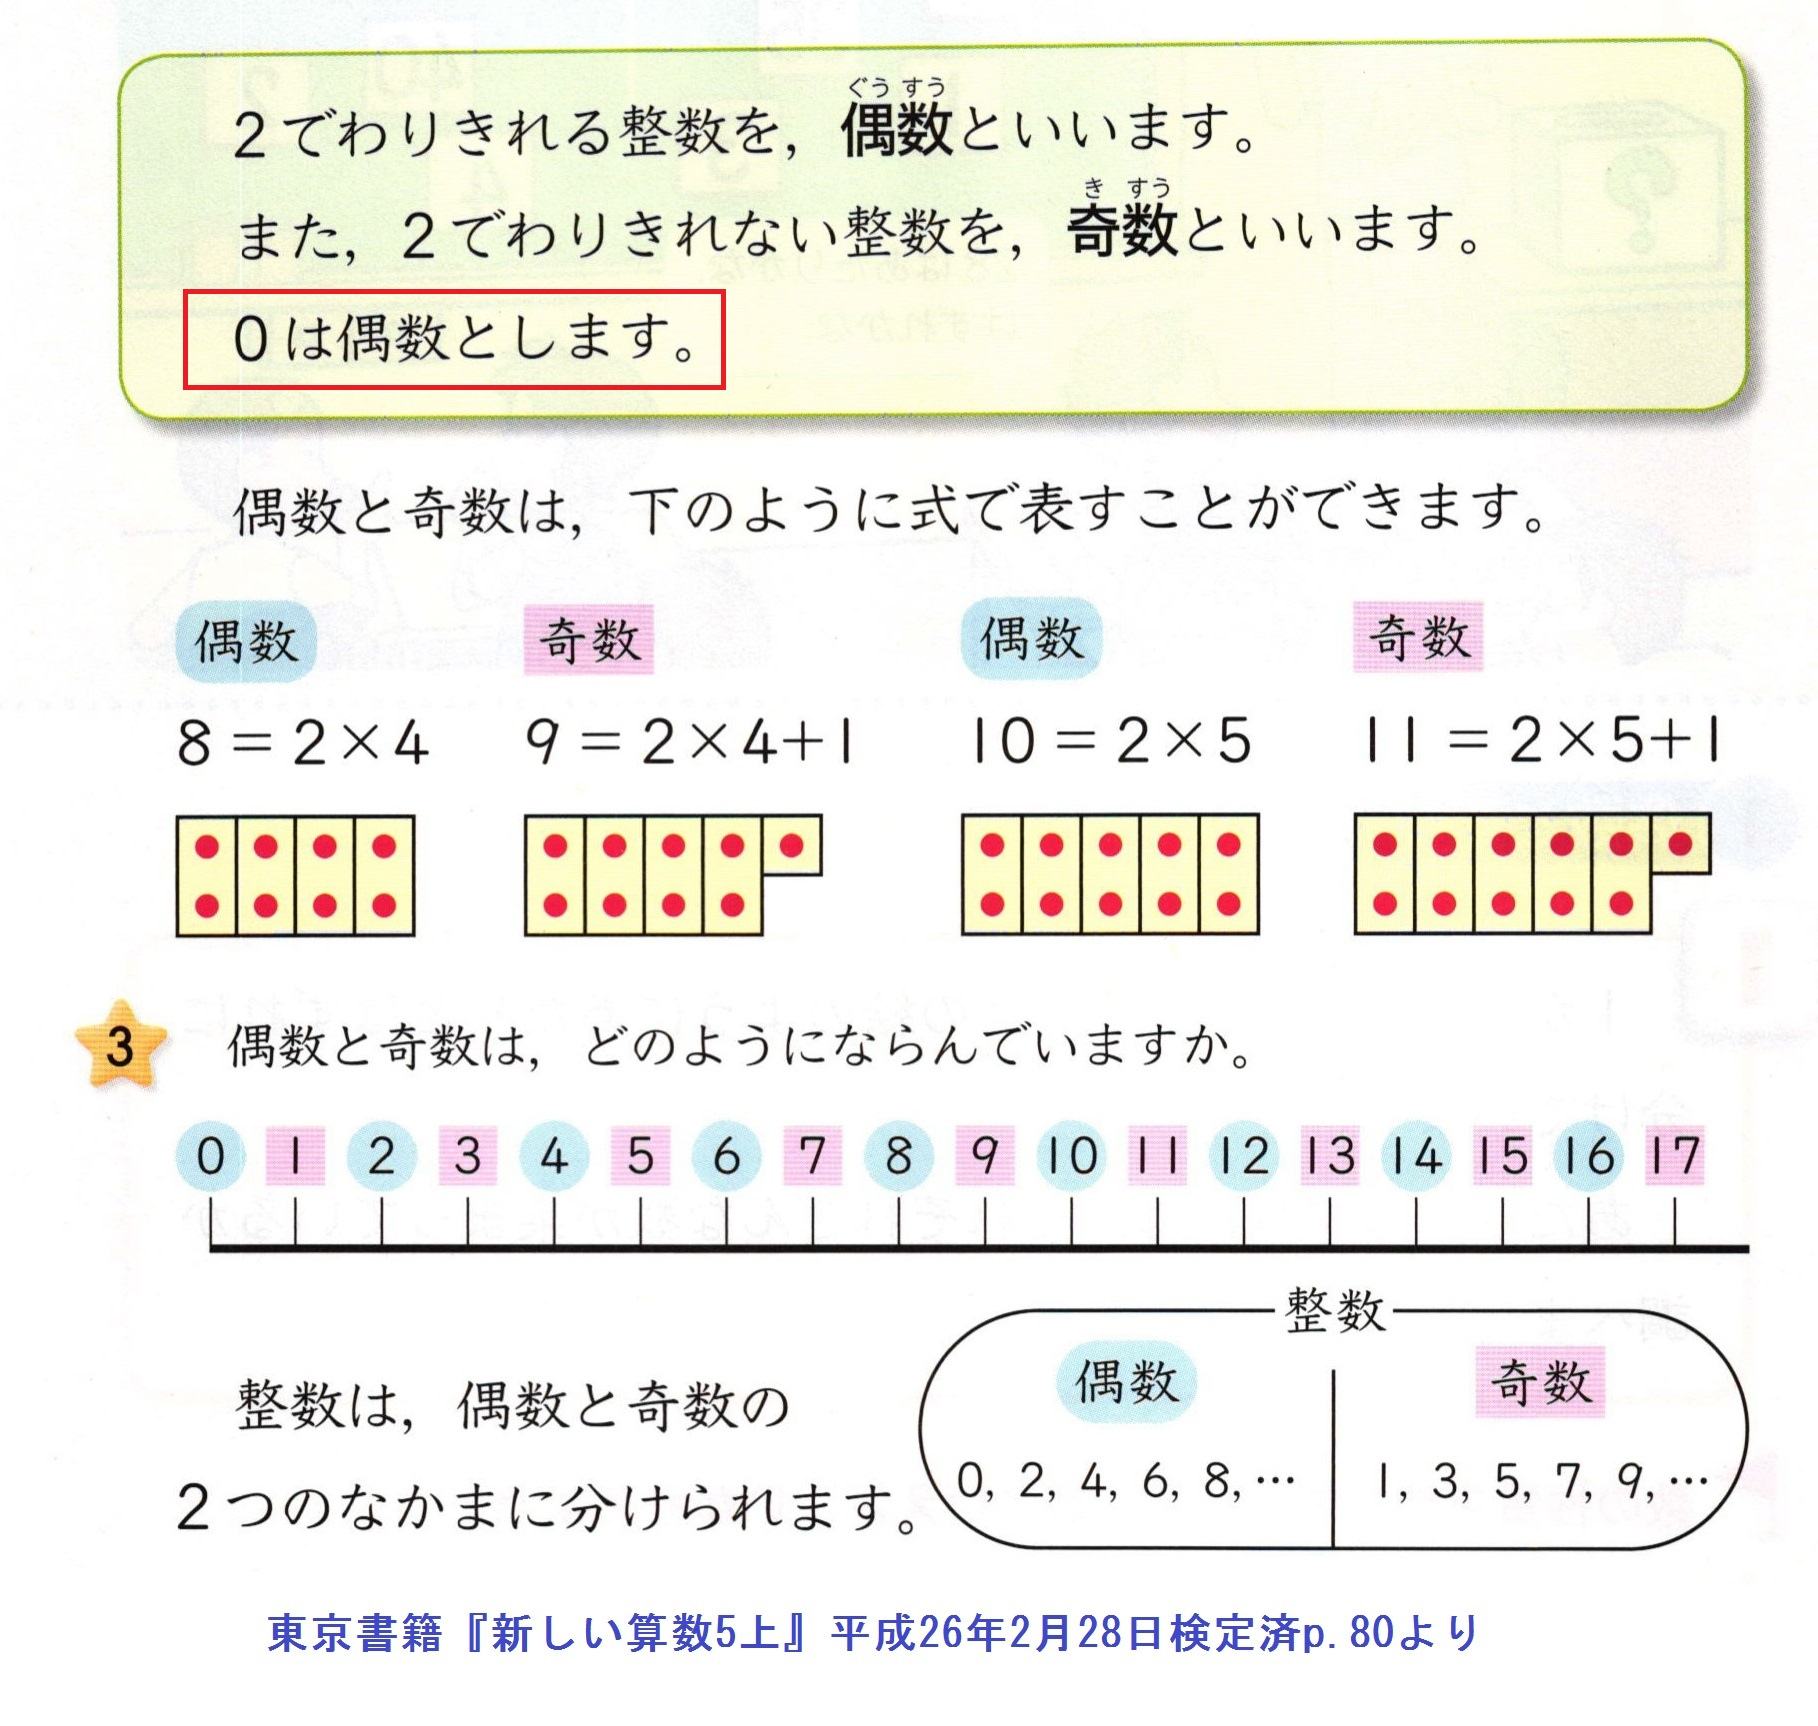

In [113]:
showimg("image/jpeg", "images/kyokasho-gusu.jpg", scale="70%")

上の偶数に関する説明は非常にわかりやすい.


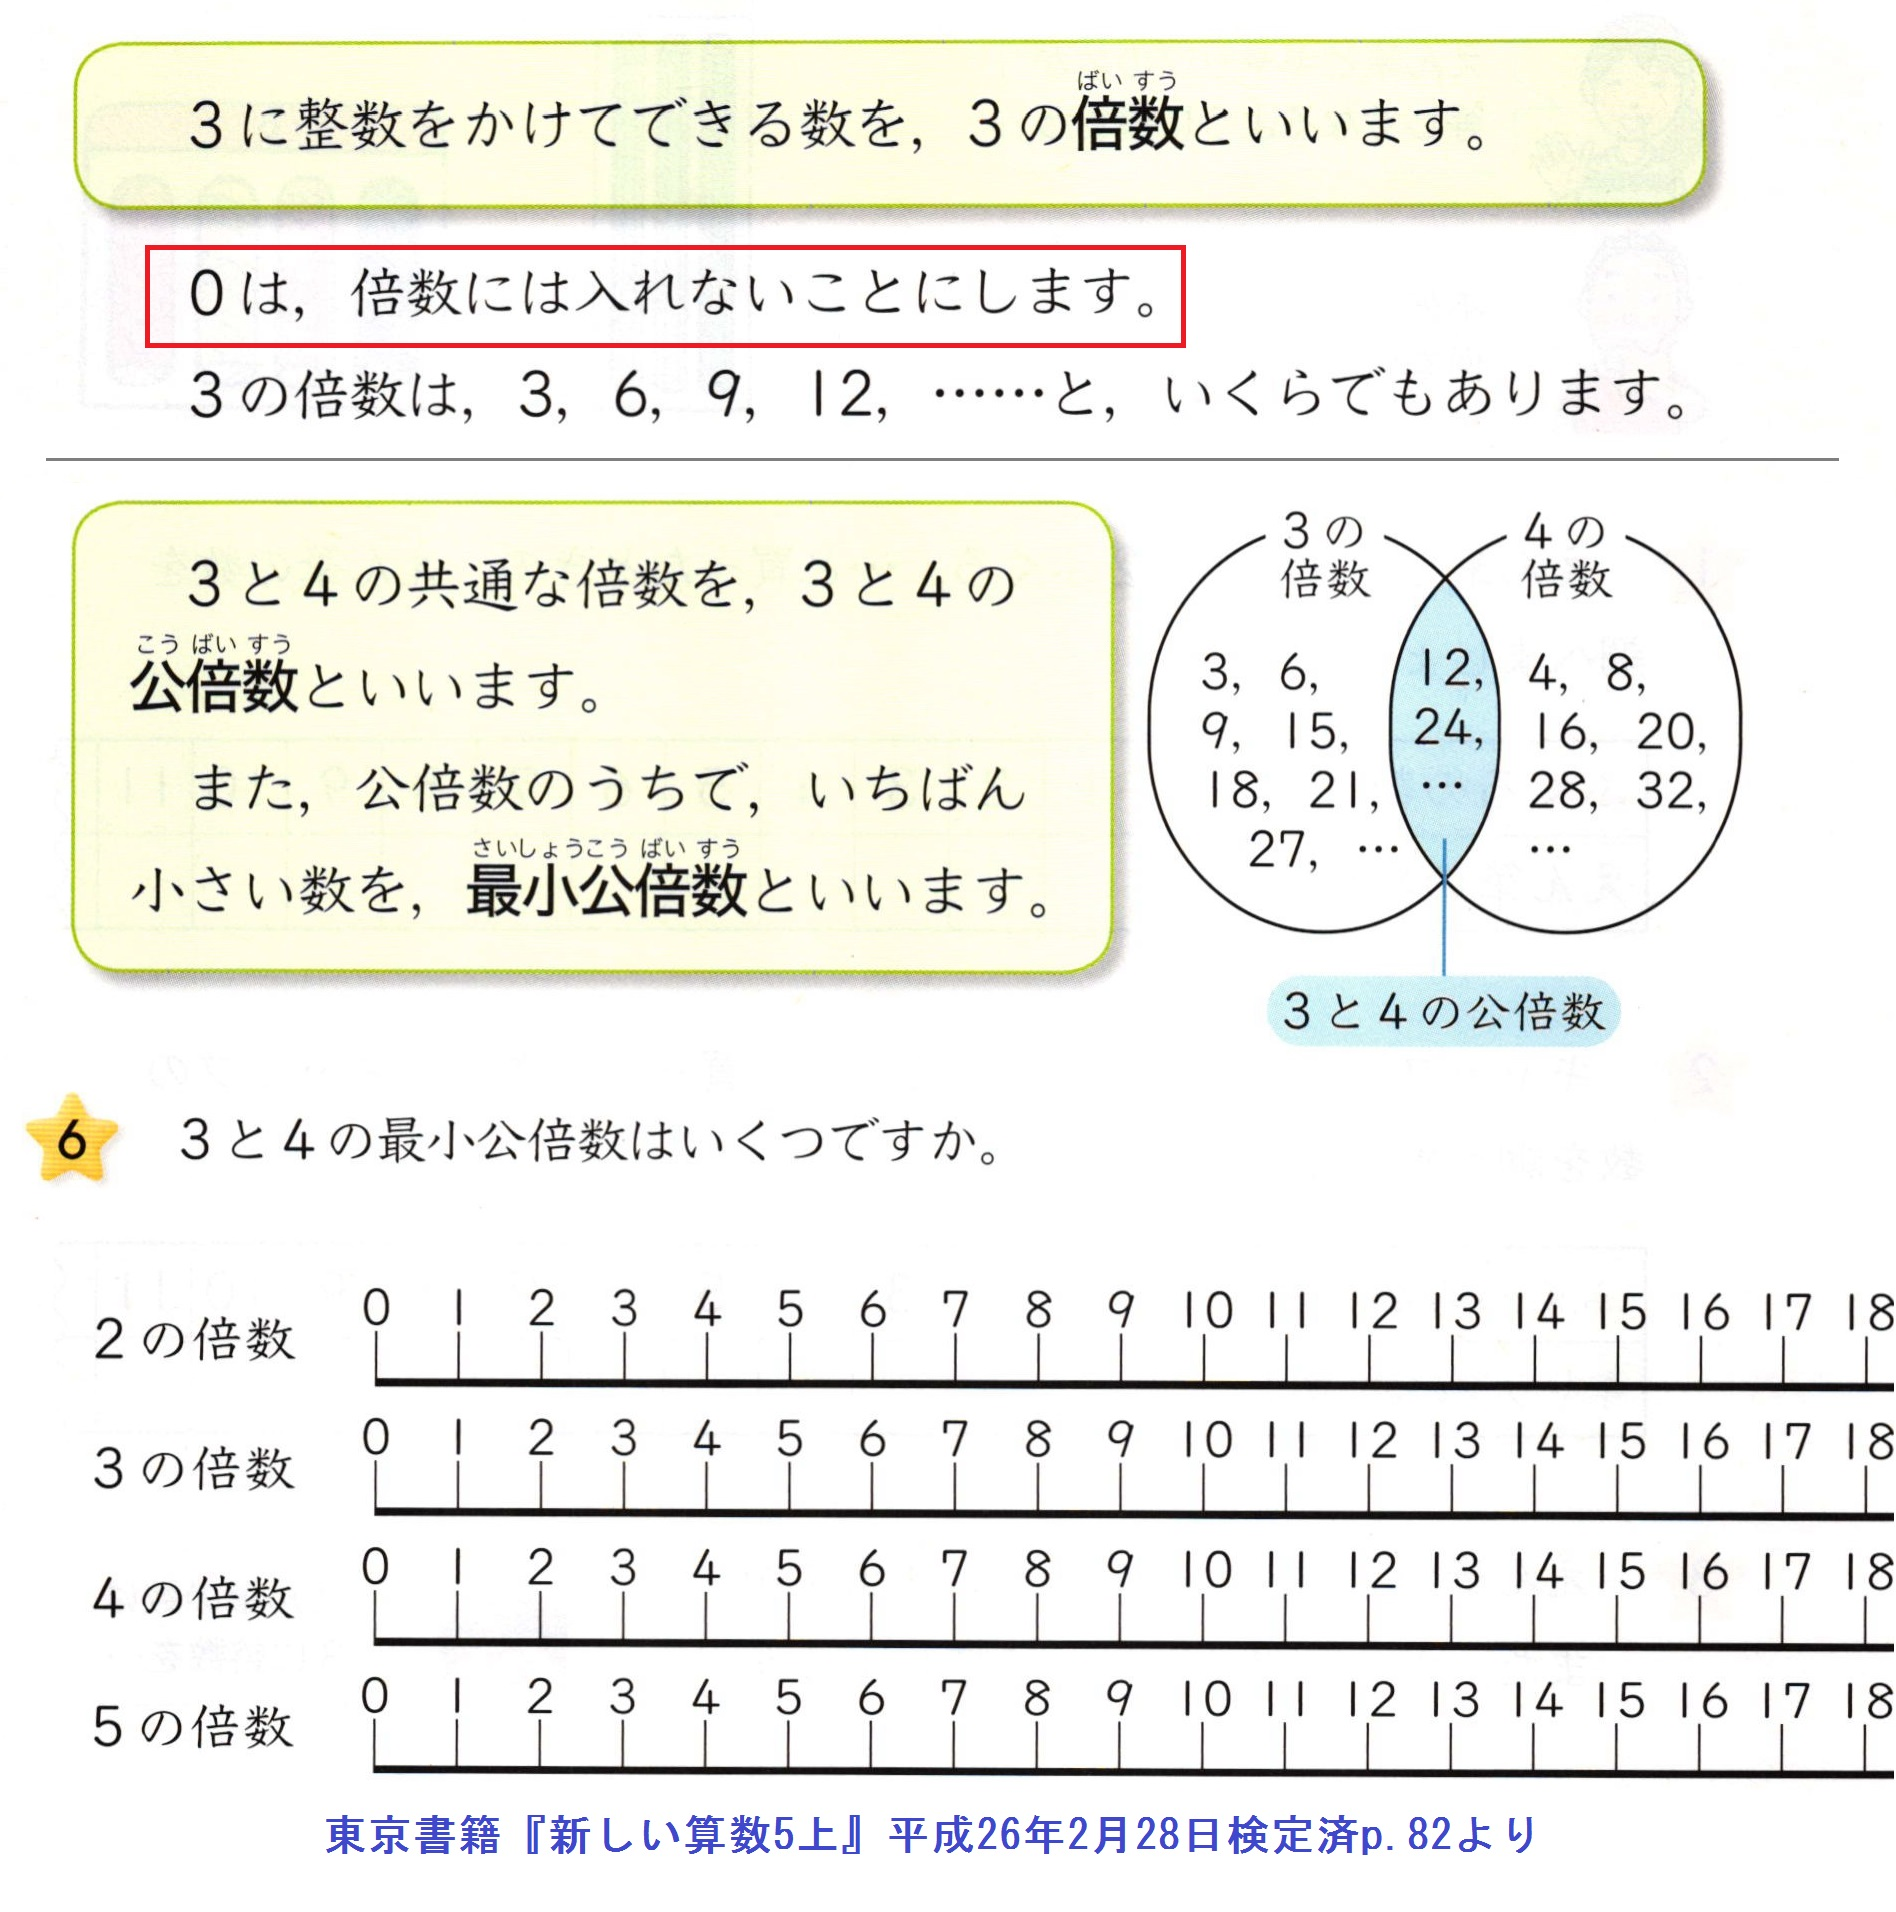

In [114]:
showimg("image/jpeg", "images/kyokasho-baisu.jpg", scale="70%")

最小公倍数を「0以外の公倍数を最小のもの」と定義しておけば問題ないのに, 「0は, 倍数には入れないことにします」と非常識なローカルルールを宣言しており, しかも**0を含む**数直線上の倍数を丸で囲ませる問題が掲載されている(問題文は引用しなかった次のページにある). そして, 「0はあらゆる数の倍数である」という標準的な常識に基いて0も丸で囲んだ児童は誤りを指摘され, 消しゴムで囲んだ丸を消すことを要求される. これが日本の算数教育の実態である.

このような事情になっているので, 中学校や高校で数学を教えるときには, 「算数の教科書には非常識なことが書いてあったこと」をはっきり述べて, 「0は倍数には入れない」という誤解を訂正しておかなければいけない. 

さて, それで文科省の立場はどうなのだろうか？ 文科省著作物の学習指導要領解説算数編(学習指導要領そのものと違って『解説』には拘束力はない)には次のように書いてある.


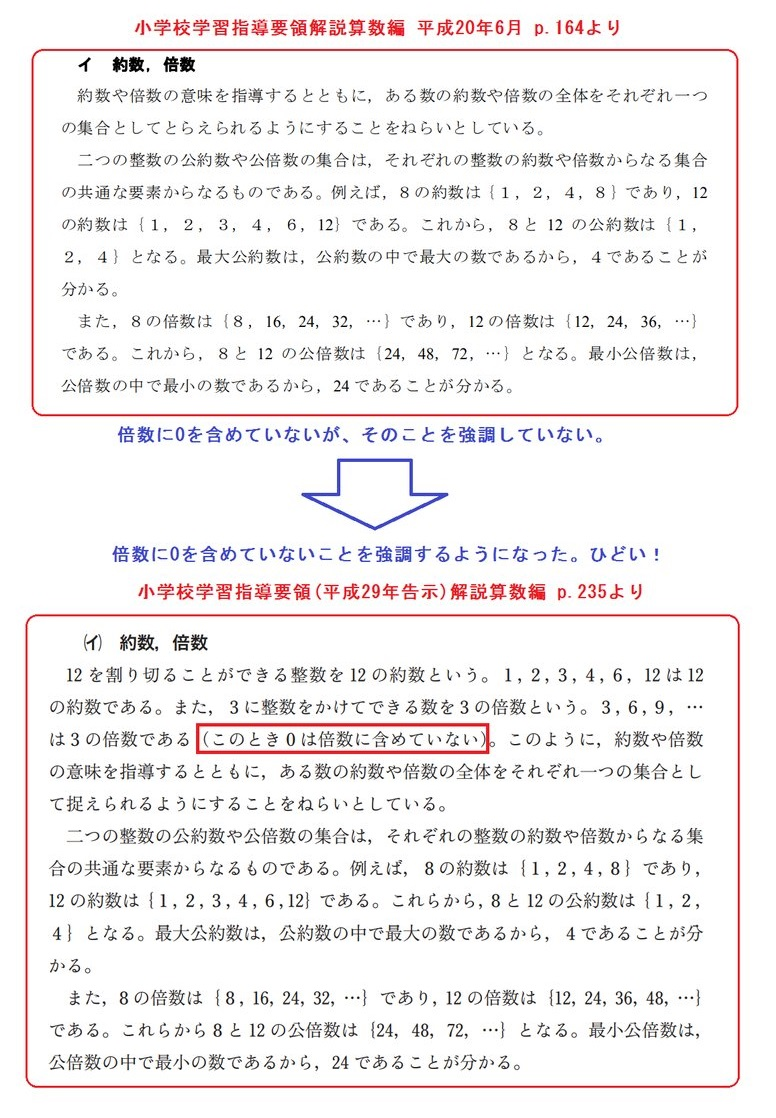

In [115]:
showimg("image/jpeg", "images/kaisetsu-baisu.jpg", scale="70%")

2008年版(平成20年版)の学習指導要領解説算数編には

>8の倍数は {8, 16, 24, 32, ...} であり, 

と0を倍数から除いてはいるが, 0を倍数に含めていないことは強調していなかったが, 平成29年版では括弧の中に0を倍数に含めていないことを強調する但し書きが追加されている.

おそらく, これによって「0があらゆる数の倍数である」という標準的なスタイルを知らずに一生を終える人が増えてしまうことになるだろう. 

**補足:** 小学校の算数教科書の世界では「偶数であることと1の位が偶数であることは同値である」は正しいが, 「2の倍数であることと1の位が2の倍数であることは同値である」は正しくない主張であることになってしまう. なぜならば $10$ は1の位の0を2の倍数と呼ぶと誤りだとされてしまうからである. $\QED$

**参照文献**

* 東京書籍の算数教科書, 新しい算数5上, 平成26年2月28日検定済

* 文部科学省, <a href="http://www.mext.go.jp/a_menu/shotou/new-cs/youryou/syokaisetsu/index.htm">小学校学習指導要領解説</a> 算数編, 平成20年6月

* 文部科学省, <a href="http://www.mext.go.jp/a_menu/shotou/new-cs/1387014.htm">小学校学習指導要領(平成29年3月告示)解説</a> 算数編 

**注意** 学習指導要領と学習指導要領解説を厳密に区別せよ! 学習指導要領は**告示**になるが, 学習指導要領解説は文科省による**著作物**に過ぎず, 法的な拘束力がない. すなわち, 学習指導要領解説に何が書いてあったとしても, それに教育関係者が従う義務はないということである.

実際, 文科省のウェブサイトにある<a href="http://www.mext.go.jp/b_menu/shingi/chukyo/chukyo3/039/siryo/attach/1402682.htm">教育課程部会 教育課程企画特別部会（第8回）配付資料3 学習指導要領（解説）等の位置付けについて</a>には次のように書いてある:

>学習指導要領解説
>
>　（文部科学省著作物）：総則及び各教科、道徳、特別活動について、学校種ごとに、学習指導要領等の改善の趣旨及び内容について解説したもの。
　※　小・中学校について、平成元年までは「指導書」としていたが、**学習指導要領と同様の拘束力を有すると誤解されるとの指摘もあったため、その位置付けを一層明確にする観点から、高等学校と同様に「解説」に改めた**。
 
太字化は引用者による. 「解説」は「拘束力を有する」と誤解されないようにするために付けられた名前である.
 
教育関係者の中には, 「学習指導要領によれば」と言いながら, 「学習指導要領解説」を引用して来る人がいるので注意が必要である. $\QED$

**資料追加:** 以下は高校の先生と大学の先生の報告の引用である. それぞれ

* https://twitter.com/tsatie/status/799138128619442177

* https://twitter.com/esumii/status/1021326851250065412

より。高校で $-20$ から $20$ までの整数で $5$ の倍数に丸で囲ませたら, $-20,-15,-10,-5$, $5,10,15,20$ と $0$ をとばして丸を付けた生徒が多数いたのだそうだ. 大学の試験の採点をしてみても同様に $0$ を倍数から除いている学生がいたらしい. このどちらも原因は小学校での算数教育だろう. 


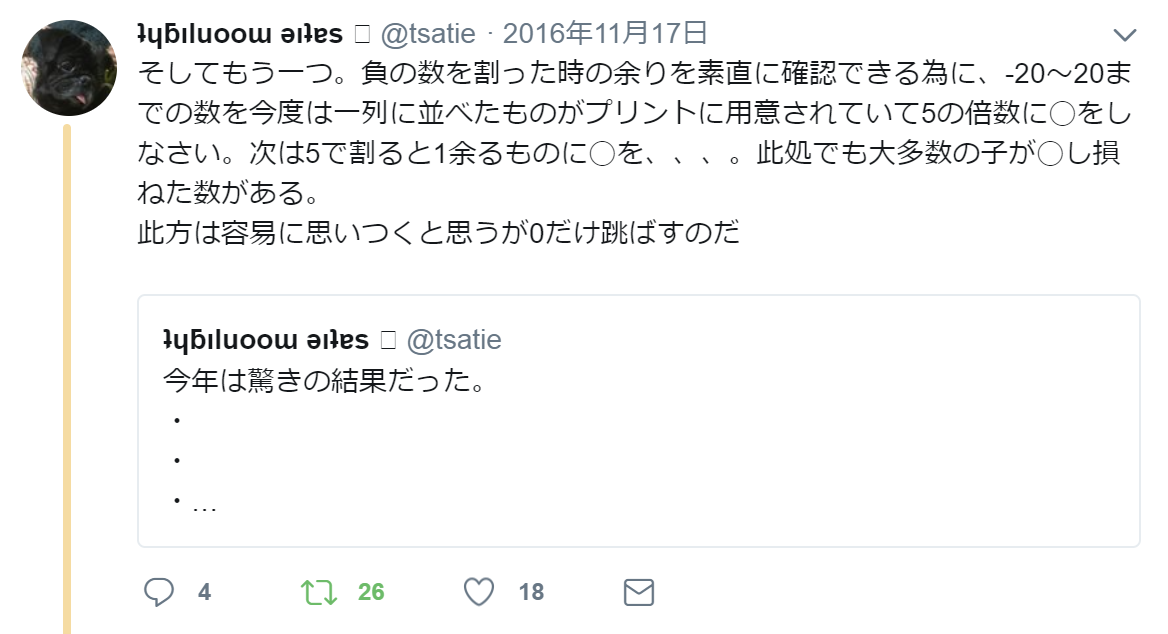

In [116]:
showimg("image/png", "images/baisu2.png", scale="70%")


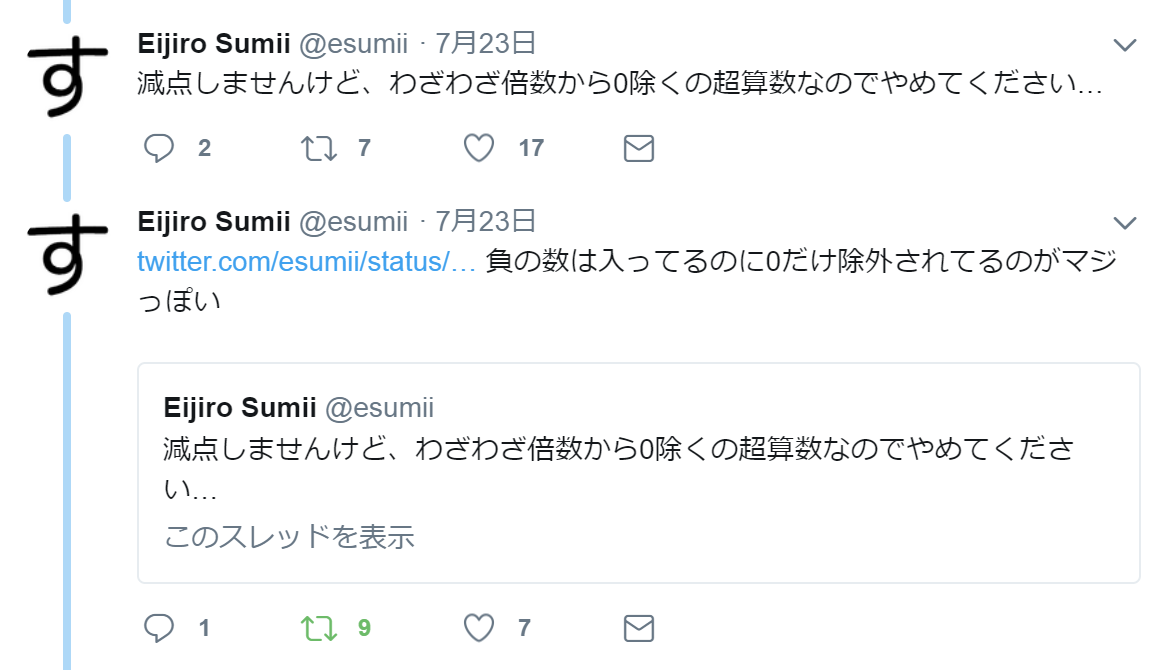

In [117]:
showimg("image/png", "images/baisu1.png", scale="70%")

## 括弧やかけ算の式は1つの数量を表す記号なのか？

<a href="http://www.edu-ctr.pref.okayama.jp/chousa/study/index.htm">岡山県総合教育センター</a>研究紀要平成18年275号には以下のように書いてある.


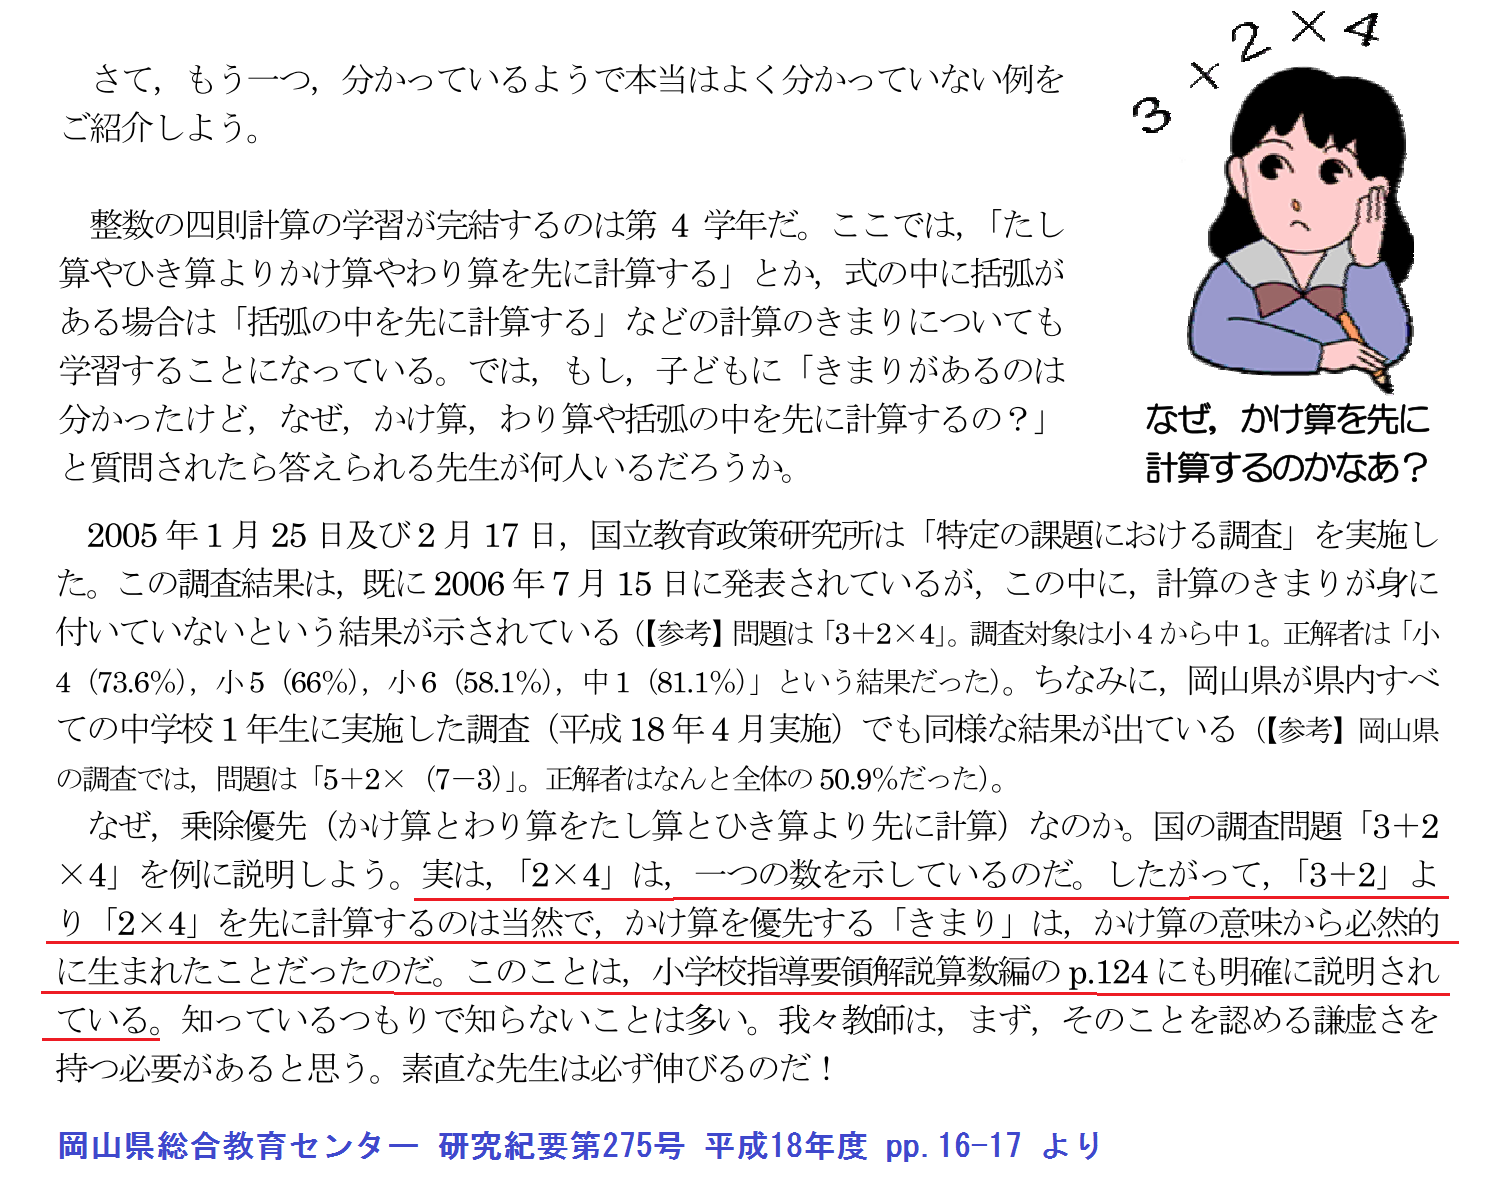

In [118]:
showimg("image/png", "images/okayama-kakezan.png", scale="70%")

「2×4」が8という一つの数を表していることは常識だろう. しかし, 「3+5」も「10-2」も「16÷2」もどれも8という一つの数を表している. だから, 上の引用文はそのような常識的解釈では意味不明の事柄について述べていることになる.

小学校学習指導要領解説算数編を見てみよう.


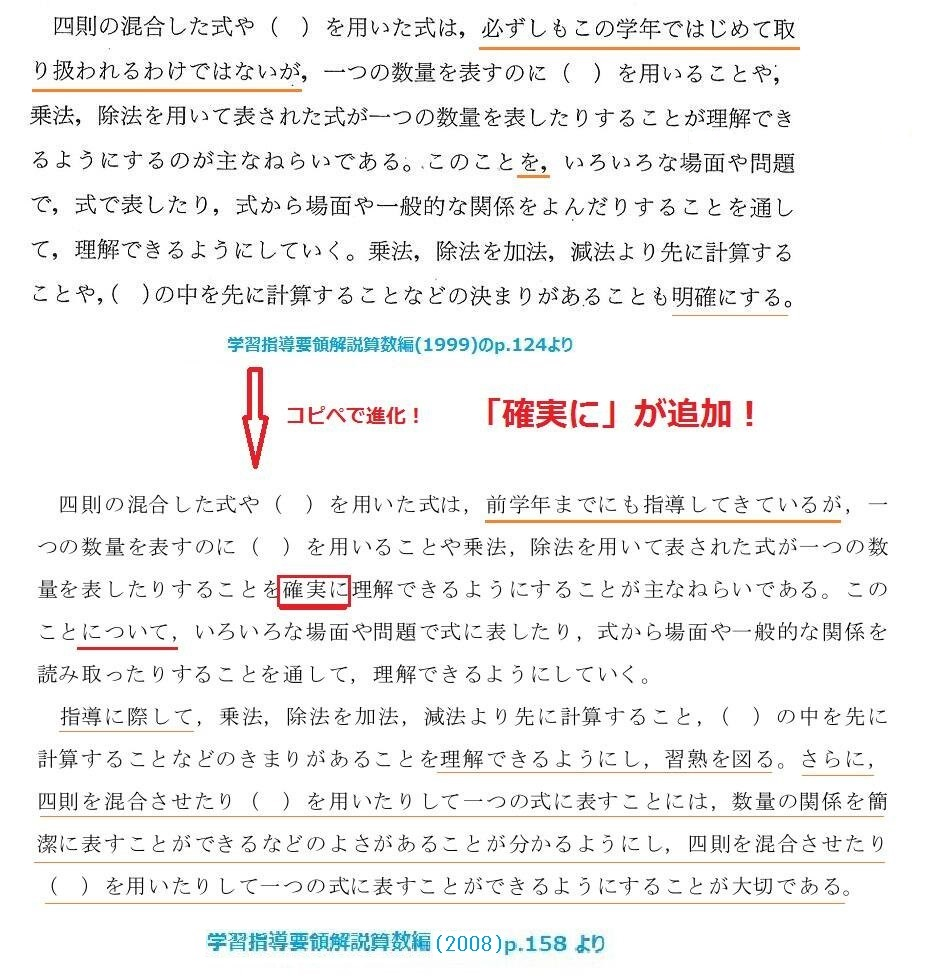

In [119]:
showimg("image/jpeg", "images/kaisetsu-kakko1.jpg", scale="70%")


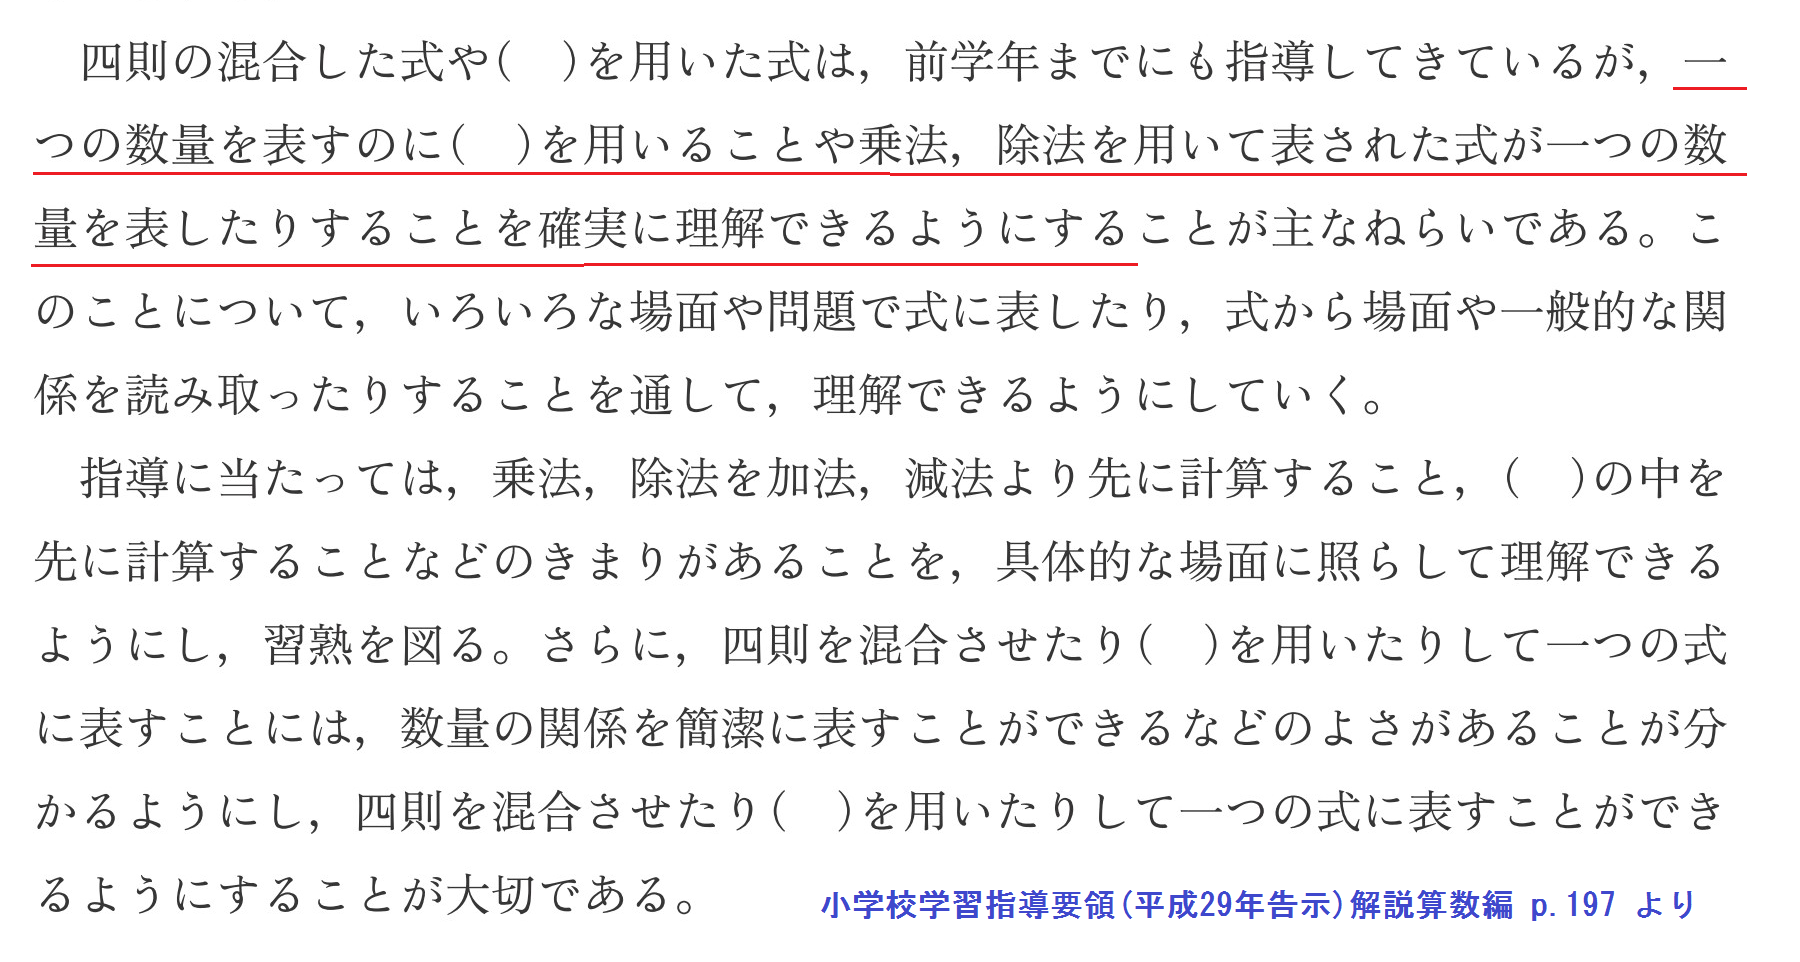

In [120]:
showimg("image/jpeg", "images/kaisetsu-kakko2.png", scale="70%")

確かに「乗法を用いて表された式が一つの数量を表したりする」とはっきり書いてある. しかし, それと乗法を加法よりも先に計算するという規則との関係は曖昧である. 学習指導要領解説算数編の特徴はこのような曖昧な記述である. 学生のレポートならば「もっとクリアに書きなさい」と指導して全文書き直しを命じたくなるレベルで曖昧な書き方になっている.

しかし, 岡山県総合教育センターでは「1つの数量なのだから, 先に計算するのは当然のことになる」と解釈しているようだ.

もちろん, その解釈は滅茶苦茶である. 「3+2×4」という記号列(式)の構文解析のルールを決めない限り, どの部分が一塊であるか, そのような順序で計算するかは決まらない. 乗法を加法より先に計算するという規則は天下り的に与えられる規則に過ぎない. 括弧は単にその内側を先に計算することを指定するための記号に過ぎない.

このようなデタラメが学習指導要領解説算数編に入ってしまった理由として, 片桐重男氏の影響が疑われている. その理由は

* 片桐重男 『算数科の指導内容の体系』 東京、東洋館出版社、2001

に下の方で引用するような説明があるからである. 片桐氏のデタラメな主張がそのまま学習指導要領解説算数編で採用されてしまった経緯はまだよくわかっていない. 

以上のように学習指導要領解説算数編には, 括弧の使い方(単に先に計算したい部分を括弧で囲む)やどうして足し算よりも掛け算を先に計算するか(単なる天下り的なルール)についてデタラメな説明がある. 中学校や高校で数学を教える人は以上のような事実に注意を払って, 教えている生徒が括弧で囲まれた部分やかけ算やわり算の式が1つの数量を表すと誤解している可能性にも注意を払う必要がある. 式の取り扱いに関して最も基本的な点においても算数教育はおかしなことになっているので注意が必要である.


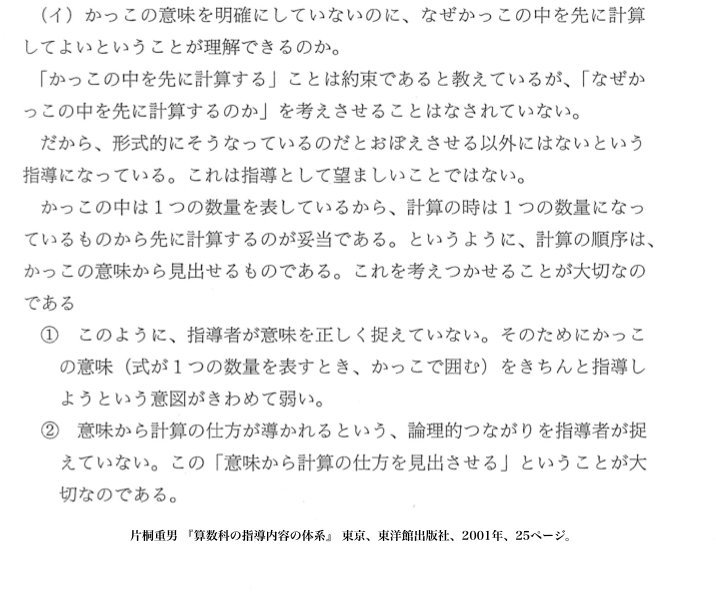

In [121]:
showimg("image/jpeg", "images/katagiri-taikei1.jpg", scale="70%")


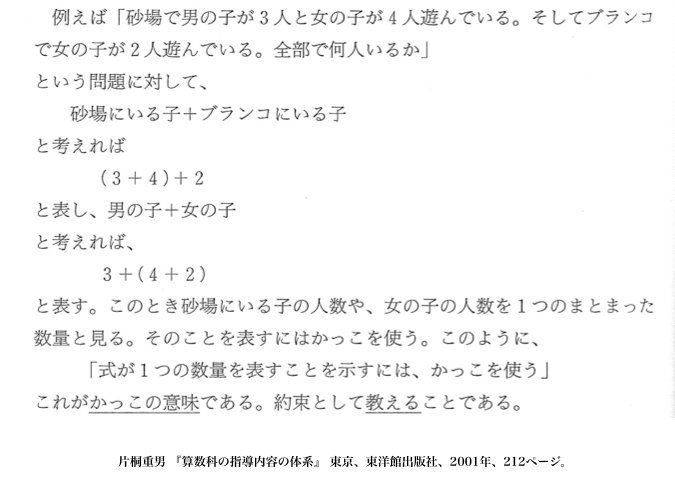

In [122]:
showimg("image/jpeg", "images/katagiri-taikei2.jpg", scale="70%")


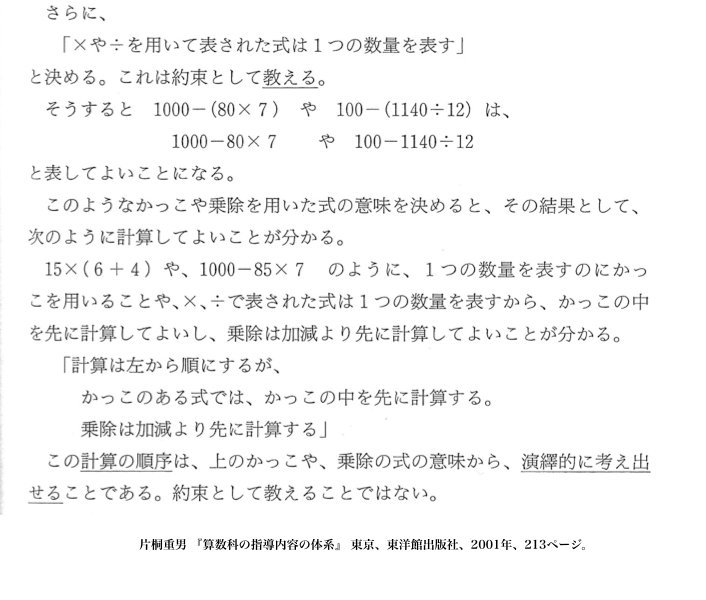

In [123]:
showimg("image/jpeg", "images/katagiri-taikei3.jpg", scale="70%")

計算の順序は単なる約束事に過ぎず, 算数や数学の本質とは関係ない.

## かけ算の順序が逆の「式」は誤りなのか？

もちろん正解は「誤りではない」である.

